In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo 
import matplotlib as mpl

from scipy.spatial import KDTree
from scipy.interpolate import griddata
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy.spatial import Delaunay
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FuncFormatter


import matplotlib.tri as tri
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cmocean.cm as cmo 
import gsw
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from Useful import *
from matplotlib.collections import PolyCollection
from scipy.spatial import Delaunay

from matplotlib.collections import LineCollection

In [2]:
print("bonjour mon pugpug je t'aime")

bonjour mon pugpug je t'aime


# Transects 

In [3]:
path1 ='../../../automated_testing/integrated_tests/idealised/Thule/results_CLNC_250/'
path2 ='../../../automated_testing/integrated_tests/idealised/Thule/results_WLNC_250/'
transectA = 'CapronaA'
transectB = 'HalbraneA'

ds_A1 = xr.open_dataset(path1+ 'transect_' + transectA +'.nc')
ds_B1 = xr.open_dataset(path1+ 'transect_' + transectB +'.nc')
ds_1 =  xr.open_dataset(path1 + 'main_output_ANT_00001.nc')

ds_A2 = xr.open_dataset(path2 + 'transect_' + transectA +'.nc')
ds_B2 = xr.open_dataset(path2 + 'transect_' + transectB +'.nc')
ds_2 =  xr.open_dataset(path2 + 'main_output_ANT_00001.nc')

In [4]:
So = ds_1['S_ocean'].squeeze()
To1 = ds_1['T_ocean'].squeeze()

#if one cold one warm
To2 = ds_2['T_ocean'].squeeze()

In [5]:
for name, ds in [('ds_1', ds_1), ('ds_2', ds_2)]:
    if 'H_lad' in ds.variables:
        print(f"{name} contains 'H_lad'")
        if name == 'ds_1':
            H_lad1 = ds['H_lad']
            S_lad1 = ds['S_lad']
            T_lad1 = ds['T_lad']
        elif name == 'ds_2':
            H_lad2 = ds['H_lad']
            S_lad2 = ds['S_lad']
            T_lad2 = ds['T_lad']
    else:
        print(f"{name} does not contain 'H_lad'")


ds_1 contains 'H_lad'
ds_2 contains 'H_lad'


In [6]:
GLA1 = ds_A1['grounding_line_distance_from_start']
GLA2 = ds_A2['grounding_line_distance_from_start']
GLB1 = ds_B1['grounding_line_distance_from_start']
GLB2 = ds_B2['grounding_line_distance_from_start']

In [7]:
tfs = 20 
afs = 18 
tifs = 15 
cbfs = 18
ctfs = 15

In [8]:
time = ds_A1['time']
k = 35
depth = To1['depth'][0:k]

In [9]:
Hb1A = ds_A1['Hb']
Hib1A = ds_A1['Hib']
Hs1A = ds_A1['Hs']
Hi1A = ds_A1['Hi']

name1 = 'CQNC'
which = 'A'

In [10]:
Hb2A = ds_A2['Hb']
Hib2A = ds_A2['Hib']
Hs2A = ds_A2['Hs']
Hi2A = ds_A2['Hi']

name2 = 'WQNC'

In [11]:
xA = np.linspace(0,len(Hib1A[0]),len(Hib1A[1]))
XA, YA = np.meshgrid(xA, depth)

In [12]:
SoA = np.tile(So.mean(dim='vi')[0:k].values[:, np.newaxis], (1, XA.shape[1]))
To1A = np.tile(To1.mean(dim='vi')[0:k].values[:, np.newaxis], (1, XA.shape[1]))
To2A = np.tile(To2.mean(dim='vi')[0:k].values[:, np.newaxis], (1, XA.shape[1]))

In [13]:
Hb1B = ds_B1['Hb']
Hib1B = ds_B1['Hib']
Hs1B = ds_B1['Hs']
Hi1B = ds_B1['Hi']

name1 = 'CQNC'
which = 'A'

Hb2B = ds_B2['Hb']
Hib2B = ds_B2['Hib']
Hs2B = ds_B2['Hs']
Hi2B = ds_B2['Hi']

name2 = 'WQNC'

xB = np.linspace(0,len(Hib1B[0]),len(Hib1B[1]))
XB, YB = np.meshgrid(xB, depth)

SoB = np.tile(So.mean(dim='vi')[0:k].values[:, np.newaxis], (1, XB.shape[1]))
To1B = np.tile(To1.mean(dim='vi')[0:k].values[:, np.newaxis], (1, XB.shape[1]))
To2B = np.tile(To2.mean(dim='vi')[0:k].values[:, np.newaxis], (1, XB.shape[1]))

## Transects Caprona 

/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/1989740758.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)


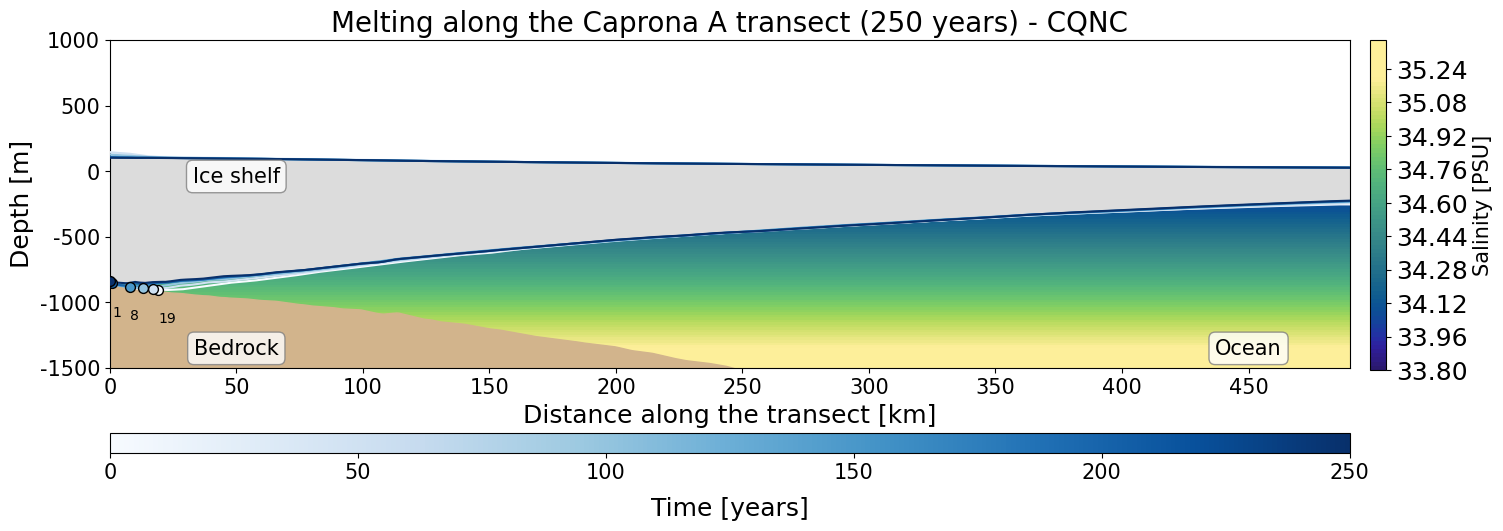

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))

# Background
contour = ax.contourf(XA, -YA, SoA, cmap=cmo.haline, levels=100, zorder=1, vmin = 33.8, vmax = 35.2) 
cbar = fig.colorbar(contour, ax=ax, shrink=0.8, pad=0.05, aspect=20)
cbar.ax.tick_params(labelsize=cbfs)
cbar.set_label('Salinity [PSU]', fontsize=ctfs)
plot_pos = ax.get_position()
cbar.ax.set_position([
    plot_pos.x1 + 0.01,      
    plot_pos.y0 + 0.22,      
    0.1,                 
    plot_pos.height * 0.715   
])

# Find the last color in contour corresponding to depth 1500 to fill in between 1500 and 2500 depth
depth_1500_idx = np.abs(depth.values - 1500).argmin()
last_color = contour.cmap(contour.norm(SoA[depth_1500_idx, -1]))
ax.fill_between(xA, -1500 * np.ones(len(Hib1A[0])),-2500 * np.ones(len(Hib1A[0])), color =last_color, alpha=1, zorder=1)


# Base of ice shelf over time 
cmap2 = plt.get_cmap('Blues')                                                                       
norm = plt.Normalize(0, Hib1A.shape[0] - 1) 

for i in range(0, Hib1A.shape[0], 5): 
    color2 = cmap2(norm(i))
    color = cmap2(norm(i))
    ax.plot(Hib1A[i], color=color2, zorder=3) 
    ax.plot(Hs1A[i], color=color, zorder=3) 
    
    #Grounding line positions
    GLA_1  = GLA1[i] /1000
    clo1 = np.abs(xA - GLA_1.values).argmin()
    ax.scatter(x=GLA_1, y=Hib1A[i][clo1], color=color2, s=50, edgecolor='black', zorder=4)
    #ax.text(float(GLA_1), Hib1A[i][clo1]-250, s=f"{float(GLA_1):.0f}")
    if i > 0:
        prev_GLA_1 = GLA1[i-5] / 1000  # step is 5
        if abs(GLA_1.values - prev_GLA_1.values) > 5:
            ax.text(float(GLA_1), Hib1A[i][clo1]-250, s=f"{float(GLA_1):.0f}")
    elif i == 0:
        ax.text(float(GLA_1), Hib1A[i][clo1]-250, s=f"{float(GLA_1):.0f}")

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])  
cbar2 = fig.colorbar(sm2, ax=ax, orientation='horizontal', pad=0.14, aspect=60)  
cbar2.set_label('Time [years]', fontsize=afs, labelpad=10)
cbar2.ax.tick_params(labelsize=tifs)
cbar2.ax.set_xticks(np.arange(0, Hib1A.shape[0], 5))
cbar2.ax.set_xticklabels((np.arange(0, Hib1A.shape[0], 5) * 10).astype(int), fontsize=tifs) 


# Fill betweens and texts 
ax.fill_between(xA, Hs1A[-1], Hib1A[-1], color='gainsboro', alpha=1, zorder=2)  
#ax.fill_between(xA, Hs1[-1], 200 * np.ones(len(Hib1[0])), color='cornflowerblue', alpha=0.5, zorder=2)  
ax.fill_between(xA, -2500 * np.ones(len(Hib1A[0])), Hb1A[-1], color='tan', alpha=1, zorder = 2)

ax.text(x=50, y=-40, s="Ice shelf", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
ax.text(x=450, y=-1350, s="Ocean", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
ax.text(x=50, y=-1350, s="Bedrock", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.text(x=161, y=140, s="b)", fontsize=afs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.axhline(-1500, color='black', linestyle='--', linewidth=1.5, label='-1500 m')

# Labels and titles
ax.set_xlabel('Distance along the transect [km]', fontsize=afs)
ax.set_xlim(0, 490)
ax.set_xticks(np.arange(0, 491, 50))
ax.set_xticklabels(np.arange(0, 491, 50) , fontsize=tifs)

ax.set_ylabel('Depth [m]', fontsize=afs)
ax.set_ylim(-1500,1000)
ax.set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)

ax.set_title('Melting along the Caprona ' + which + ' transect (250 years) - ' + name1 , fontsize=tfs)

plt.show()


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/2637197493.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)


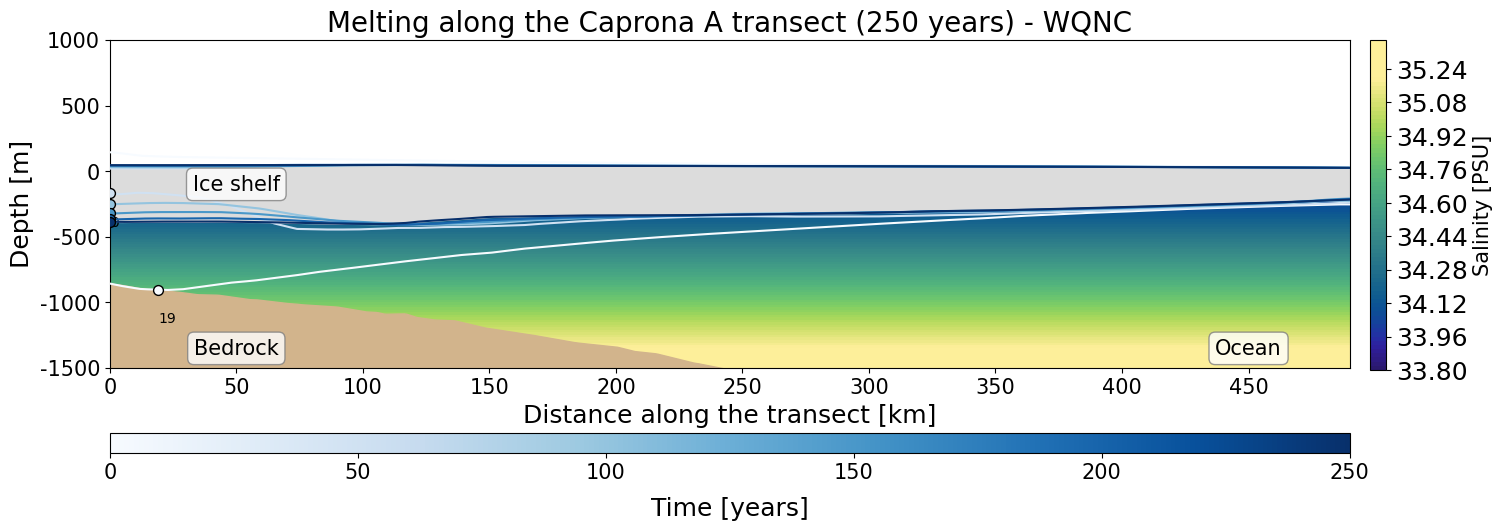

In [15]:
fig, ax = plt.subplots(figsize=(20, 6))

# Background
contour = ax.contourf(XA, -YA, SoA, cmap=cmo.haline, levels=100, zorder=1, vmin = 33.8, vmax = 35.2) 
cbar = fig.colorbar(contour, ax=ax, shrink=0.8, pad=0.05, aspect=20)
cbar.ax.tick_params(labelsize=cbfs)
cbar.set_label('Salinity [PSU]', fontsize=ctfs)
plot_pos = ax.get_position()
cbar.ax.set_position([
    plot_pos.x1 + 0.01,      
    plot_pos.y0 + 0.22,      
    0.1,                 
    plot_pos.height * 0.715   
])

# Find the last color in contour corresponding to depth 1500 to fill in between 1500 and 2500 depth
depth_1500_idx = np.abs(depth.values - 1500).argmin()
last_color = contour.cmap(contour.norm(SoA[depth_1500_idx, -1]))
ax.fill_between(xA, -1500 * np.ones(len(Hib2A[0])),-2500 * np.ones(len(Hib2A[0])), color =last_color, alpha=1, zorder=1)


# Base of ice shelf over time 
cmap2 = plt.get_cmap('Blues')                                                                        
norm = plt.Normalize(0, Hib2A.shape[0] - 1) 

for i in range(0, Hib2A.shape[0], 5): 
    color2 = cmap2(norm(i))
    color = cmap2(norm(i))
    ax.plot(Hib2A[i], color=color2, zorder=3) 
    ax.plot(Hs2A[i], color=color, zorder=3) 

    #Grounding line positions
    GLA_2  = GLA2[i] /1000
    clo2 = np.abs(xA - GLA_2.values).argmin()
    ax.scatter(x=GLA_2, y=Hib2A[i][clo2], color=color2, s=50, edgecolor='black', zorder=4)
    #ax.text(float(GLA_2), Hib2A[i][clo2]-250, s=f"{float(GLA_2):.0f}")
    
    if i > 0:
        prev_GLA_2 = GLA2[i-5] / 1000  # step is 5
        if abs(GLA_2.values - prev_GLA_2.values) > 5:
            ax.text(float(GLA_2), Hib2A[i][clo2]-250, s=f"{float(GLA_2):.0f}")
    elif i == 0:
        ax.text(float(GLA_2), Hib2A[i][clo2]-250, s=f"{float(GLA_2):.0f}")

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])  
cbar2 = fig.colorbar(sm2, ax=ax, orientation='horizontal', pad=0.14, aspect=60)  
cbar2.set_label('Time [years]', fontsize=afs, labelpad=10)
cbar2.ax.tick_params(labelsize=tifs)
cbar2.ax.set_xticks(np.arange(0, Hib2A.shape[0], 5))
cbar2.ax.set_xticklabels((np.arange(0, Hib2A.shape[0], 5) * 10).astype(int), fontsize=tifs) 


# Fill betweens and texts 
ax.fill_between(xA, Hs2A[-1], Hib2A[-1], color='gainsboro', alpha=1, zorder=2)  
#ax.fill_between(xA, Hs1[-1], 200 * np.ones(len(Hib1[0])), color='cornflowerblue', alpha=0.5, zorder=2)  
ax.fill_between(xA, -2500 * np.ones(len(Hib2A[0])), Hb2A[-1], color='tan', alpha=1, zorder = 2)

ax.text(x=50, y=-100, s="Ice shelf", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
ax.text(x=450, y=-1350, s="Ocean", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
ax.text(x=50, y=-1350, s="Bedrock", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.text(x=161, y=140, s="b)", fontsize=afs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.axhline(-1500, color='black', linestyle='--', linewidth=1.5, label='-1500 m')

# Labels and titles
ax.set_xlabel('Distance along the transect [km]', fontsize=afs)
ax.set_xlim(0, 490)
ax.set_xticks(np.arange(0, 491, 50))
ax.set_xticklabels(np.arange(0, 491, 50) , fontsize=tifs)

ax.set_ylabel('Depth [m]', fontsize=afs)
ax.set_ylim(-1500,1000)
ax.set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)

ax.set_title('Melting along the Caprona ' + which + ' transect (250 years) - ' + name2 , fontsize=tfs)

plt.show()



/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/3065319873.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)


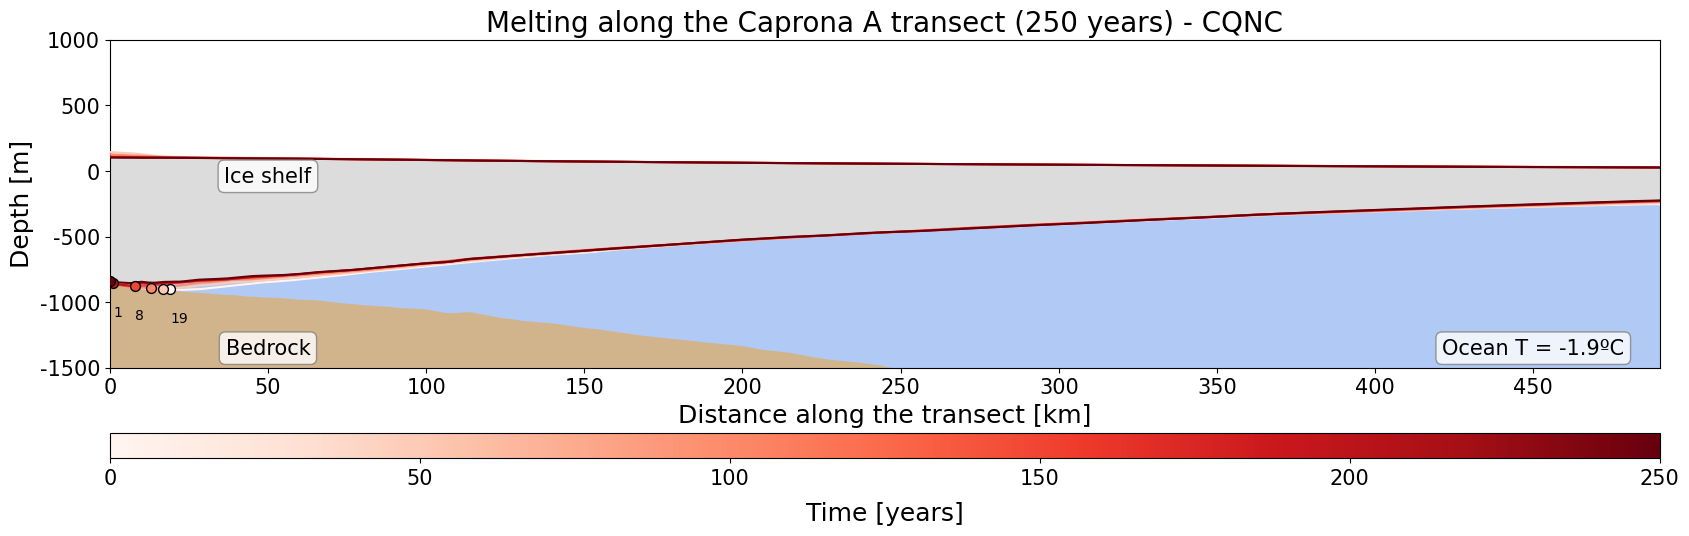

In [16]:
fig, ax = plt.subplots(figsize=(20, 6))

# Base of ice shelf over time 
cmap2 = plt.get_cmap('Reds')                                                                   
norm = plt.Normalize(0, Hib1A.shape[0] - 1) 

# Base of ice shelf over time 

for i in range(0, Hib1A.shape[0], 5): 
    color2 = cmap2(norm(i))
    color = cmap2(norm(i))
    ax.plot(Hib1A[i], color=color2, zorder=3) 
    ax.plot(Hs1A[i], color=color, zorder=3) 
    
    # Grounding line positions
    GLA_1  = GLA1[i] / 1000
    clo1 = np.abs(xA - GLA_1.values).argmin()
    ax.scatter(x=GLA_1, y=Hib1A[i][clo1], color=color2, s=50, edgecolor='black', zorder=4)
    # Only add text if the distance to previous position is over 5 km
    if i > 0:
        prev_GLA_1 = GLA1[i-5] / 1000  # step is 5
        if abs(GLA_1.values - prev_GLA_1.values) > 5:
            ax.text(float(GLA_1), Hib1A[i][clo1]-250, s=f"{float(GLA_1):.0f}")
    elif i == 0:
        ax.text(float(GLA_1), Hib1A[i][clo1]-250, s=f"{float(GLA_1):.0f}")
sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])  
cbar2 = fig.colorbar(sm2, ax=ax, orientation='horizontal', pad=0.14, aspect=60)  
cbar2.set_label('Time [years]', fontsize=afs, labelpad=10)
cbar2.ax.tick_params(labelsize=tifs)
cbar2.ax.set_xticks(np.arange(0, Hib1A.shape[0], 5))
cbar2.ax.set_xticklabels((np.arange(0, Hib1A.shape[0], 5) * 10).astype(int), fontsize=tifs) 


# Fill betweens and texts 
ax.fill_between(xA, Hs1A[-1], Hib1A[-1], color='gainsboro', alpha=1, zorder=2)  
ax.fill_between(xA, -2500 * np.ones(len(Hib1A[0])), np.zeros(len(Hib1A[0])), color='cornflowerblue', alpha=0.5, zorder=1)  
ax.fill_between(xA, -2500 * np.ones(len(Hib1A[0])), Hb1A[-1], color='tan', alpha=1, zorder = 2)

ax.text(x=50, y=-40, s="Ice shelf", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
ax.text(x=450, y=-1350, s="Ocean T = -1.9ºC", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
ax.text(x=50, y=-1350, s="Bedrock", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.text(x=161, y=140, s="b)", fontsize=afs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.axhline(-1500, color='black', linestyle='--', linewidth=1.5, label='-1500 m')

# Labels and titles
ax.set_xlabel('Distance along the transect [km]', fontsize=afs)
ax.set_xlim(0, 490)
ax.set_xticks(np.arange(0, 491, 50))
ax.set_xticklabels(np.arange(0, 491, 50) , fontsize=tifs)

ax.set_ylabel('Depth [m]', fontsize=afs)
ax.set_ylim(-1500,1000)
ax.set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)

ax.set_title('Melting along the Caprona ' + which + ' transect (250 years) - ' + name1 , fontsize=tfs)

plt.show()


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/747922949.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)


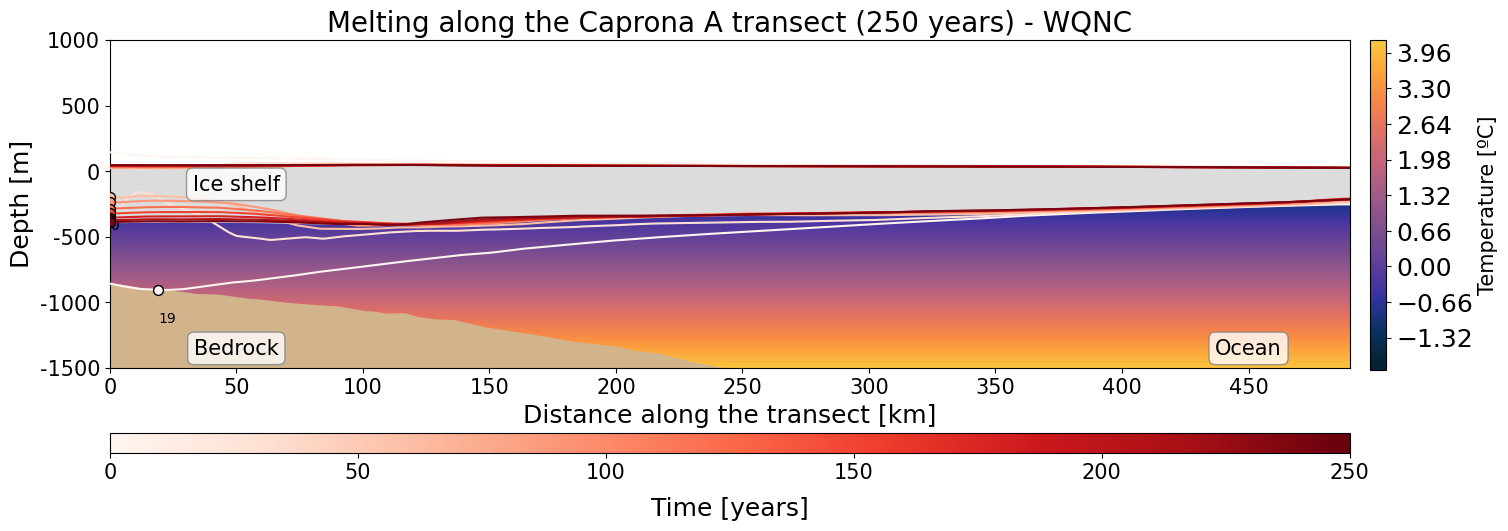

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))

# Background
contour = ax.contourf(XA, -YA, To2A, cmap=cmo.thermal, levels=100, zorder=1, vmin=-1.8, vmax=5) 
cbar = fig.colorbar(contour, ax=ax, shrink=0.8, pad=0.05, aspect=20)
cbar.ax.tick_params(labelsize=cbfs)
cbar.set_label('Temperature [ºC]', fontsize=ctfs)
plot_pos = ax.get_position()
cbar.ax.set_position([
    plot_pos.x1 + 0.01,      
    plot_pos.y0 + 0.22,      
    0.1,                 
    plot_pos.height * 0.715   
])

# Find the last color in contour corresponding to depth 1500 to fill in between 1500 and 2500 depth
depth_1500_idx = np.abs(depth.values - 1500).argmin()
last_color = contour.cmap(contour.norm(To2A[depth_1500_idx, -1]))
ax.fill_between(xA, -1500 * np.ones(len(Hib2A[0])),-2500 * np.ones(len(Hib2A[0])), color =last_color, alpha=1, zorder=1)


# Base of ice shelf over time 
cmap2 = plt.get_cmap('Reds')                                                                        
norm = plt.Normalize(0, Hib2A.shape[0] - 1) 

for i in range(0, Hib2A.shape[0], 3): 
    color2 = cmap2(norm(i))
    color = cmap2(norm(i))
    ax.plot(Hib2A[i], color=color2, zorder=3) 
    ax.plot(Hs2A[i], color=color, zorder=3) 

    #Grounding line positions
    GLA_2  = GLA2[i] /1000
    clo2 = np.abs(xA - GLA_2.values).argmin()
    ax.scatter(x=GLA_2, y=Hib2A[i][clo2], color=color2, s=50, edgecolor='black', zorder=4)
    #ax.text(float(GLA_2), Hib2A[i][clo2]-250, s=f"{float(GLA_2):.0f}")
        
    if i > 0:
        prev_GLA_2 = GLA2[i-5] / 1000  # step is 5
        if abs(GLA_2.values - prev_GLA_2.values) > 5:
            ax.text(float(GLA_2), Hib2A[i][clo2]-250, s=f"{float(GLA_2):.0f}")
    elif i == 0:
        ax.text(float(GLA_2), Hib2A[i][clo2]-250, s=f"{float(GLA_2):.0f}")


sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)

sm2.set_array([])  
cbar2 = fig.colorbar(sm2, ax=ax, orientation='horizontal', pad=0.14, aspect=60)  
cbar2.set_label('Time [years]', fontsize=afs, labelpad=10)
cbar2.ax.tick_params(labelsize=tifs)
cbar2.ax.set_xticks(np.arange(0, Hib2A.shape[0], 5))
cbar2.ax.set_xticklabels((np.arange(0, Hib2A.shape[0], 5) * 10).astype(int), fontsize=tifs) 


# Fill betweens and texts 
ax.fill_between(xA, Hs2A[-1], Hib2A[-1], color='gainsboro', alpha=1, zorder=2)  
#ax.fill_between(xA, Hs1[-1], 200 * np.ones(len(Hib1[0])), color='cornflowerblue', alpha=0.5, zorder=2)  
ax.fill_between(xA, -2500 * np.ones(len(Hib2A[0])), Hb2A[-1], color='tan', alpha=1, zorder = 2)

ax.text(x=50, y=-100, s="Ice shelf", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
ax.text(x=450, y=-1350, s="Ocean", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
ax.text(x=50, y=-1350, s="Bedrock", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.text(x=161, y=140, s="b)", fontsize=afs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.axhline(-1500, color='black', linestyle='--', linewidth=1.5, label='-1500 m')

# Labels and titles
ax.set_xlabel('Distance along the transect [km]', fontsize=afs)
ax.set_xlim(0, 490)
ax.set_xticks(np.arange(0, 491, 50))
ax.set_xticklabels(np.arange(0, 491, 50) , fontsize=tifs)

ax.set_ylabel('Depth [m]', fontsize=afs)
ax.set_ylim(-1500,1000)
ax.set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)

ax.set_title('Melting along the Caprona ' + which + ' transect (250 years) - ' + name2 , fontsize=tfs)

plt.show()

/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/3794553240.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


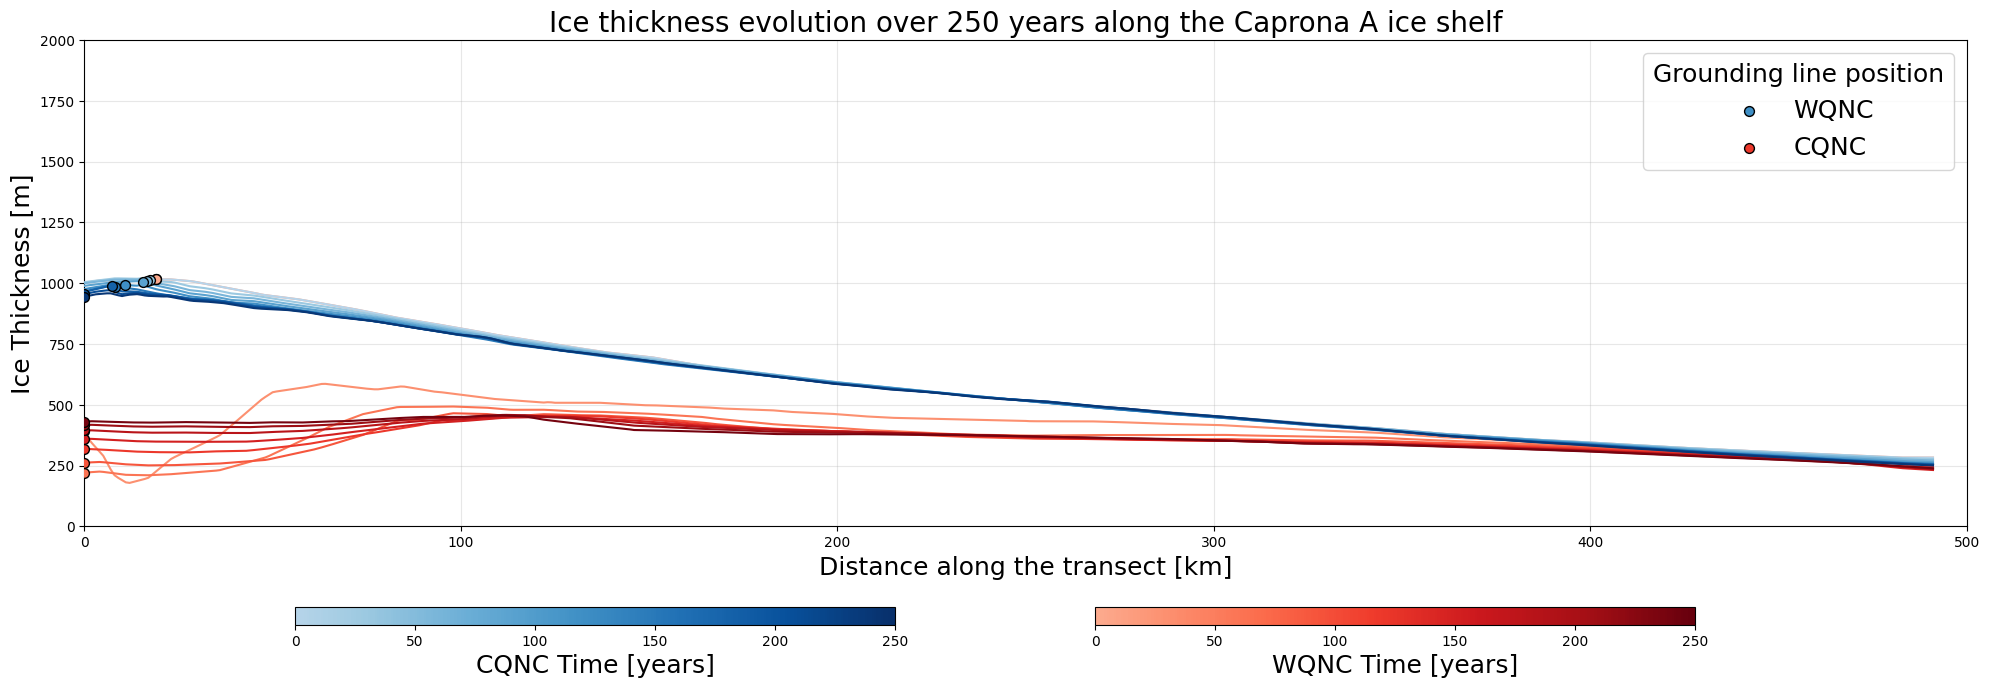

In [18]:
# Select time step one (i.e., time index 1) for all relevant DataArrays
cmap1 = plt.get_cmap('Blues')
cmap2 = plt.get_cmap('Reds')                                                                        
norm = plt.Normalize(0, Hi1A.shape[0] - 1)

cmap1_dark = mcolors.LinearSegmentedColormap.from_list('trunc_blues', cmap1(np.linspace(0.3, 1.0, 256)))
cmap2_dark = mcolors.LinearSegmentedColormap.from_list('trunc_reds', cmap2(np.linspace(0.3, 1.0, 256)))

fig, ax = plt.subplots(figsize=(20, 6))

#Grounding line positions

for i in range(0, Hi1A.shape[0], 3): 
    color2 = cmap2_dark(norm(i))
    color1 = cmap1_dark(norm(i))
    H_1 = Hi1A.isel(time=i)
    H_2 = Hi2A.isel(time=i)
    GLA_1  = GLA1[i] / 1000
    GLA_2  = GLA2[i] / 1000
    
    ax.plot(H_2, color=color2, zorder=3)
    ax.plot(H_1, color=color1, zorder=3)

    clo1 = np.abs(xA - GLA_1.values).argmin()
    clo2 = np.abs(xA - GLA_2.values).argmin()
    
    ax.scatter(x=GLA_1, y=H_1[clo1], color=color1, s=50, edgecolor='black', zorder=4, label='WQNC' if i == 12 else "") 
    ax.scatter(x=GLA_2, y=H_2[clo2], color=color2, s=50, edgecolor='black', zorder=4, label='CQNC' if i == 12 else "") 

legend = ax.legend(fontsize=afs, title='Grounding line position', title_fontsize=afs)
ax.set_title('Ice thickness evolution over 250 years along the Caprona A ice shelf', fontsize=tfs)
ax.set_xlim(0, 500)
ax.set_ylim(0, 2000)
ax.set_xlabel('Distance along the transect [km]', fontsize=afs)
ax.set_ylabel('Ice Thickness [m]', fontsize=afs)
plt.grid(alpha=0.3)

# Create dual colorbars
cbar_ax1 = fig.add_axes([0.15, -0.05, 0.3, 0.03])  # [left, bottom, width, height]
cbar_ax2 = fig.add_axes([0.55, -0.05, 0.3, 0.03])

sm1 = plt.cm.ScalarMappable(cmap=cmap1_dark, norm=norm)
sm1.set_array([])  
cbar1 = fig.colorbar(sm1, cax=cbar_ax1, orientation='horizontal')
cbar1.set_label('CQNC Time [years]', fontsize=afs)

sm2 = plt.cm.ScalarMappable(cmap=cmap2_dark, norm=norm)
sm2.set_array([])  
cbar2 = fig.colorbar(sm2, cax=cbar_ax2, orientation='horizontal')
cbar2.set_label('WQNC Time [years]', fontsize=afs)

# Set same ticks for both colorbars
ticks = np.arange(0, Hi1A.shape[0], 5)
cbar1.set_ticks(ticks)
cbar1.set_ticklabels((ticks * 10).astype(int))
cbar2.set_ticks(ticks)
cbar2.set_ticklabels((ticks * 10).astype(int))

plt.tight_layout()
plt.show()

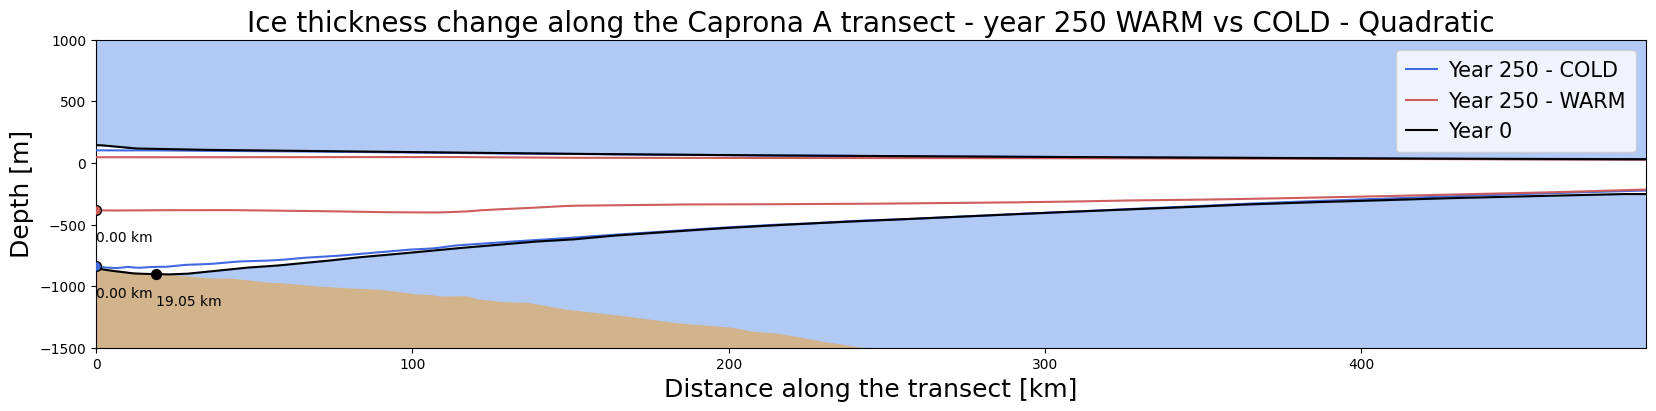

In [19]:
fig, ax = plt.subplots(figsize=(20, 4))

# Surface of ice shelfs  
ax.plot(Hs1A[-1], color='royalblue', zorder=3)
ax.plot(Hs2A[-1], color='indianred', zorder=3)
ax.plot(Hs2A[0], color='black', zorder=3)

# Base of ice shelfs
ax.plot(Hib1A[-1], color='royalblue', zorder=3,label= 'Year 250 - COLD')
ax.plot(Hib2A[-1], color='indianred', zorder=3, label ='Year 250 - WARM')
ax.plot(Hib1A[0], color='black', zorder=3, label = 'Year 0')

ax.legend(loc='upper right', fontsize=ctfs, frameon=True, handlelength=1.5, handletextpad=0.5, borderpad=0.5)

#grounding line positions
GL_A1 = GLA1[-1] /1000
GL_A2 = GLA2[-1] /1000
GL_A = GLA1[0] /1000

clo1 = np.abs(xA - GL_A1.values).argmin()
clo2 = np.abs(xA - GL_A2.values).argmin()
clo = np.abs(xA - GL_A.values).argmin() 

ax.scatter(x=GL_A, y=Hib1A[0][clo], color='black', s=50, edgecolor='black', zorder=4)
ax.text(float(GL_A), Hib1A[0][clo]-250, s=f"{float(GL_A):.2f} km")     
ax.scatter(x=GL_A1, y=Hib1A[-1][clo1], color='royalblue', s=50, edgecolor='black', zorder=4)
ax.text(float(GL_A1), Hib1A[-1][clo1]-250,s=f"{float(GL_A1):.2f} km")
ax.scatter(x=GL_A2, y=Hib2A[-1][clo2], color='indianred', s=50, edgecolor='black', zorder=4)
ax.text(float(GL_A2), Hib2A[-1][clo2]-250,s=f"{float(GL_A2):.2f} km")

# Fill betweens 
#ax.fill_between(xA, Hs1[-1], Hib2[-1], color='gainsboro', alpha=1, zorder=2)  
ax.fill_between(xA, -2500 * np.ones(len(Hib2A[0])), Hb2A[-1], color='tan', alpha=1, zorder = 2)
ax.fill_between(xA, Hib1A[0], -2500 * np.ones(len(Hib1A[0])), color='cornflowerblue', alpha=0.5, zorder=1) 
ax.fill_between(xA, Hs1A[0], 1000 * np.ones(len(Hib1A[0])), color='cornflowerblue', alpha=0.5, zorder=1) 

# Labels and titles
ax.set_xlabel('Distance along the transect [km]', fontsize=afs)
ax.set_xlim(0, 490)
#ax.set_xticks(np.arange(690, 741, 10))
#ax.set_xticklabels(np.arange(1500, 7401, 500) / 10, fontsize=tifs)

ax.set_ylabel('Depth [m]', fontsize=afs)
ax.set_ylim(-1500,1000)
#ax.set_yticklabels(np.arange(-2500, 1000,100), fontsize=tifs)

ax.set_title('Ice thickness change along the Caprona A transect - year 250 WARM vs COLD - Quadratic', fontsize=tfs)

plt.show()


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/2854533041.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels((plt.gca().get_yticks() / 1000).astype(int))


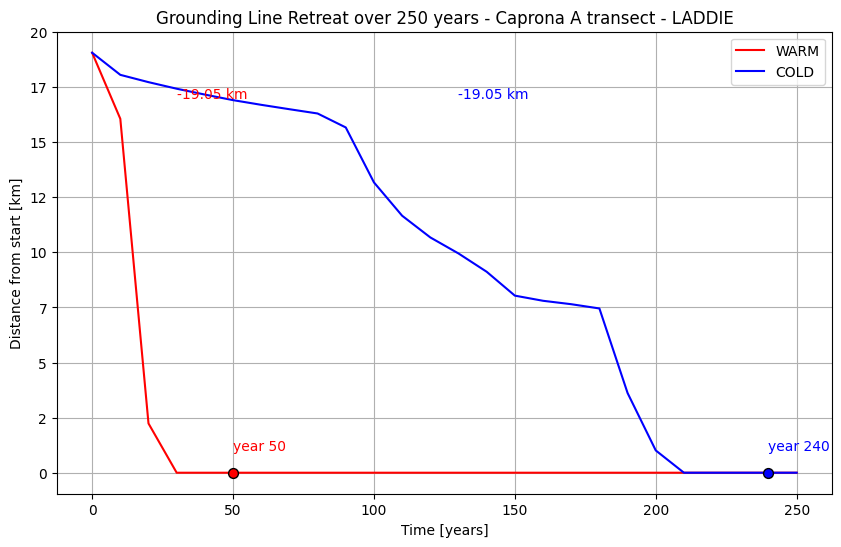

In [29]:
plt.figure(figsize=(10, 6))

GLA2.plot(color='red', label='WARM')
GLA1.plot(color='blue', label='COLD')
plt.legend()

plt.xlabel('Time [years]')
plt.ylabel('Distance [m]')
plt.gca().set_yticklabels((plt.gca().get_yticks() / 1000).astype(int))
plt.ylabel('Distance from start [km]')
plt.grid()
first_zero_idx_A2 = np.where(GLA2.values == 0)[0]
first_zero_idx_A1 = np.where(GLA1.values == 0)[0]

# Corrected text formatting
plt.text(50, 1000, "year 50", color='red')
plt.text(240, 1000, "year 240", color='blue')
plt.scatter(50,0, color='red', s=50, edgecolor='black', zorder=4)
plt.scatter(240,0, color='blue', s=50, edgecolor='black', zorder=4)

plt.text(30, 17000, f"{(GLA2[-1] - GLA2[0]).values / 1000:.2f} km", color='red')
plt.text(130, 17000, f"{(GLA1[-1] - GLA1[0]).values / 1000:.2f} km", color='blue')

plt.title('Grounding Line Retreat over 250 years - Caprona A transect - LADDIE')
plt.show()

## Transects Halbrane 

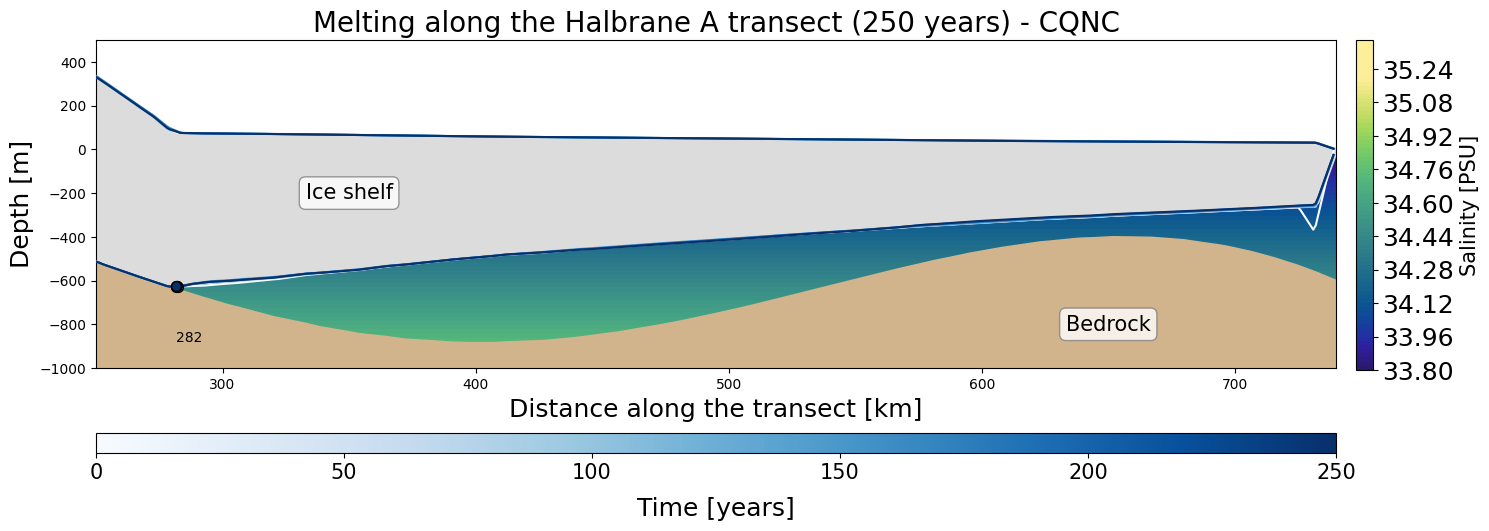

In [21]:
fig, ax = plt.subplots(figsize=(20, 6))

# Background
contour = ax.contourf(XB, -YB, SoB, cmap=cmo.haline, levels=100, zorder=1, vmin = 33.8, vmax = 35.2) 
cbar = fig.colorbar(contour, ax=ax, shrink=0.8, pad=0.05, aspect=20)
cbar.ax.tick_params(labelsize=cbfs)
cbar.set_label('Salinity [PSU]', fontsize=ctfs)
plot_pos = ax.get_position()
cbar.ax.set_position([
    plot_pos.x1 + 0.01,      
    plot_pos.y0 + 0.22,      
    0.1,                 
    plot_pos.height * 0.715   
])

# Find the last color in contour corresponding to depth 1500 to fill in between 1500 and 2500 depth
depth_1500_idx = np.abs(depth.values - 1500).argmin()
last_color = contour.cmap(contour.norm(SoA[depth_1500_idx, -1]))
ax.fill_between(xB, -1500 * np.ones(len(Hib1B[0])),-2500 * np.ones(len(Hib1B[0])), color =last_color, alpha=1, zorder=1)


# Base of ice shelf over time 
cmap2 = plt.get_cmap('Blues')                                                                       
norm = plt.Normalize(0, Hib1B.shape[0] - 1) 
for i in range(0, Hib1B.shape[0], 5): 
    color2 = cmap2(norm(i))
    color = cmap2(norm(i))
    ax.plot(Hib1B[i], color=color2, zorder=3) 
    ax.plot(Hs1B[i], color=color, zorder=3) 

    #Grounding line positions
    GLB_1  = GLB1[i] /1000
    clo1 = np.abs(xB - GLB_1.values).argmin()
    ax.scatter(x=GLB_1, y=Hib1B[i][clo1], color=color2, s=50, edgecolor='black', zorder=4)
    #ax.text(float(GLB_1), Hib1B[i][clo1]-250, s=f"{float(GLB_1):.0f}")
        
    if i > 0:
        prev_GLB_1 = GLB1[i-5] / 1000  # step is 5
        if abs(GLB_1.values - prev_GLB_1.values) > 5:
            ax.text(float(GLB_1), Hib1B[i][clo1]-250, s=f"{float(GLB_1):.0f}")
    elif i == 0:
        ax.text(float(GLB_1), Hib1B[i][clo1]-250, s=f"{float(GLB_1):.0f}")


sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])  
cbar2 = fig.colorbar(sm2, ax=ax, orientation='horizontal', pad=0.14, aspect=60)  
cbar2.set_label('Time [years]', fontsize=afs, labelpad=10)
cbar2.ax.tick_params(labelsize=tifs)
cbar2.ax.set_xticks(np.arange(0, Hib1B.shape[0], 5))
cbar2.ax.set_xticklabels((np.arange(0, Hib1B.shape[0], 5) * 10).astype(int), fontsize=tifs) 


# Fill betweens and texts 
ax.fill_between(xB, Hs1B[-1], Hib1B[-1], color='gainsboro', alpha=1, zorder=2)  
#ax.fill_between(xA, Hs1[-1], 200 * np.ones(len(Hib1[0])), color='cornflowerblue', alpha=0.5, zorder=2)  
ax.fill_between(xB, -2500 * np.ones(len(Hib1B[0])), Hb1B[-1], color='tan', alpha=1, zorder = 2)

ax.text(x=350, y=-200, s="Ice shelf", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.text(x=450, y=-1550, s="Ocean", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
ax.text(x=650, y=-800, s="Bedrock", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.text(x=161, y=140, s="b)", fontsize=afs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.axhline(-1500, color='black', linestyle='--', linewidth=1.5, label='-1500 m')

# Labels and titles
ax.set_xlabel('Distance along the transect [km]', fontsize=afs)
ax.set_xlim(250, 740)
#ax.set_xticks(np.arange(0, 491, 50))
#ax.set_xticklabels(np.arange(0, 491, 50) , fontsize=tifs)

ax.set_ylabel('Depth [m]', fontsize=afs)
ax.set_ylim(-1000,500)
#ax.set_yticklabels(np.arange(-2500,1001,500), fontsize=tifs)

ax.set_title('Melting along the Halbrane ' + which + ' transect (250 years) - ' + name1 , fontsize=tfs)

plt.show()


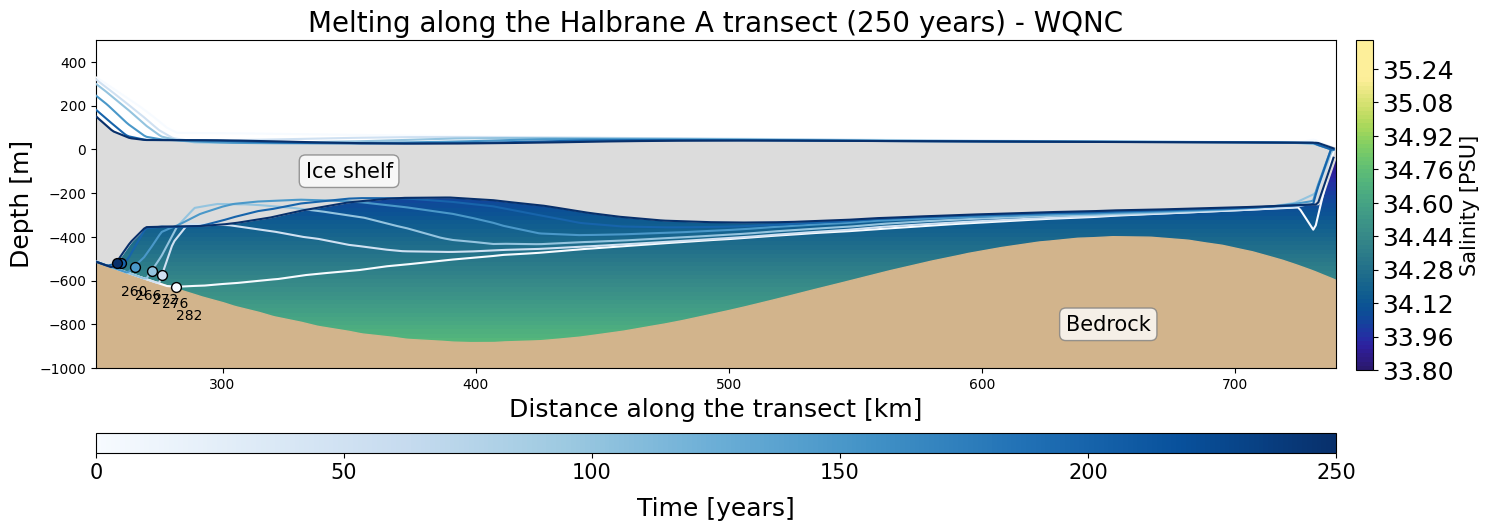

In [22]:
fig, ax = plt.subplots(figsize=(20, 6))

# Background
contour = ax.contourf(XB, -YB, SoB, cmap=cmo.haline, levels=100, zorder=1, vmin = 33.8, vmax = 35.2) 
cbar = fig.colorbar(contour, ax=ax, shrink=0.8, pad=0.05, aspect=20)
cbar.ax.tick_params(labelsize=cbfs)
cbar.set_label('Salinity [PSU]', fontsize=ctfs)
plot_pos = ax.get_position()
cbar.ax.set_position([
    plot_pos.x1 + 0.01,      
    plot_pos.y0 + 0.22,      
    0.1,                 
    plot_pos.height * 0.715   
])

# Find the last color in contour corresponding to depth 1500 to fill in between 1500 and 2500 depth
depth_1500_idx = np.abs(depth.values - 1500).argmin()
last_color = contour.cmap(contour.norm(SoA[depth_1500_idx, -1]))
ax.fill_between(xB, -1500 * np.ones(len(Hib2B[0])),-2500 * np.ones(len(Hib2B[0])), color =last_color, alpha=1, zorder=1)


# Base of ice shelf over time 
cmap2 = plt.get_cmap('Blues')                                                                        
norm = plt.Normalize(0, Hib2B.shape[0] - 1) 

for i in range(0, Hib2B.shape[0], 5): 
    color2 = cmap2(norm(i))
    color = cmap2(norm(i))
    ax.plot(Hib2B[i], color=color2, zorder=3) 
    ax.plot(Hs2B[i], color=color, zorder=3) 

    #Grounding line positions
    GLB_2  = GLB2[i] /1000
    clo2 = np.abs(xB - GLB_2.values).argmin()
    ax.scatter(x=GLB_2, y=Hib2B[i][clo2], color=color2, s=50, edgecolor='black', zorder=4)
    #ax.text(float(GLB_2), Hib2B[i][clo2]-250, s=f"{float(GLB_2):.0f}")
    if i > 0:
        prev_GLB_2 = GLB2[i-5] / 1000  # step is 5
        if abs(GLB_2.values - prev_GLB_2.values) > 4:
            ax.text(float(GLB_2), Hib2B[i][clo2]-150, s=f"{float(GLB_2):.0f}")
    elif i == 0:
        ax.text(float(GLB_2), Hib2B[i][clo2]-150, s=f"{float(GLB_2):.0f}")
    #elif i == Hib2B.shape[0] - 1:
     #   ax.text(float(GLB_2), Hib2B[i][clo2]-150, s=f"{float(GLB_2):.0f}")

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])  
cbar2 = fig.colorbar(sm2, ax=ax, orientation='horizontal', pad=0.14, aspect=60)  
cbar2.set_label('Time [years]', fontsize=afs, labelpad=10)
cbar2.ax.tick_params(labelsize=tifs)
cbar2.ax.set_xticks(np.arange(0, Hib2B.shape[0], 5))
cbar2.ax.set_xticklabels((np.arange(0, Hib2B.shape[0], 5) * 10).astype(int), fontsize=tifs) 


# Fill betweens and texts 
ax.fill_between(xB, Hs2B[-1], Hib2B[-1], color='gainsboro', alpha=1, zorder=2)  
#ax.fill_between(xA, Hs1[-1], 200 * np.ones(len(Hib1[0])), color='cornflowerblue', alpha=0.5, zorder=2)  
ax.fill_between(xB, -2500 * np.ones(len(Hib2B[0])), Hb2B[-2], color='tan', alpha=1, zorder = 2)

ax.text(x=350, y=-100, s="Ice shelf", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.text(x=450, y=-1550, s="Ocean", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
ax.text(x=650, y=-800, s="Bedrock", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.text(x=161, y=140, s="b)", fontsize=afs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.axhline(-1500, color='black', linestyle='--', linewidth=1.5, label='-1500 m')

# Labels and titles
ax.set_xlabel('Distance along the transect [km]', fontsize=afs)
ax.set_xlim(250, 740)
#ax.set_xticks(np.arange(0, 491, 50))
#ax.set_xticklabels(np.arange(0, 491, 50) , fontsize=tifs)

ax.set_ylabel('Depth [m]', fontsize=afs)
ax.set_ylim(-1000,500)
#ax.set_yticklabels(np.arange(-2500,1001,500), fontsize=tifs)

ax.set_title('Melting along the Halbrane ' + which + ' transect (250 years) - ' + name2 , fontsize=tfs)

plt.show()



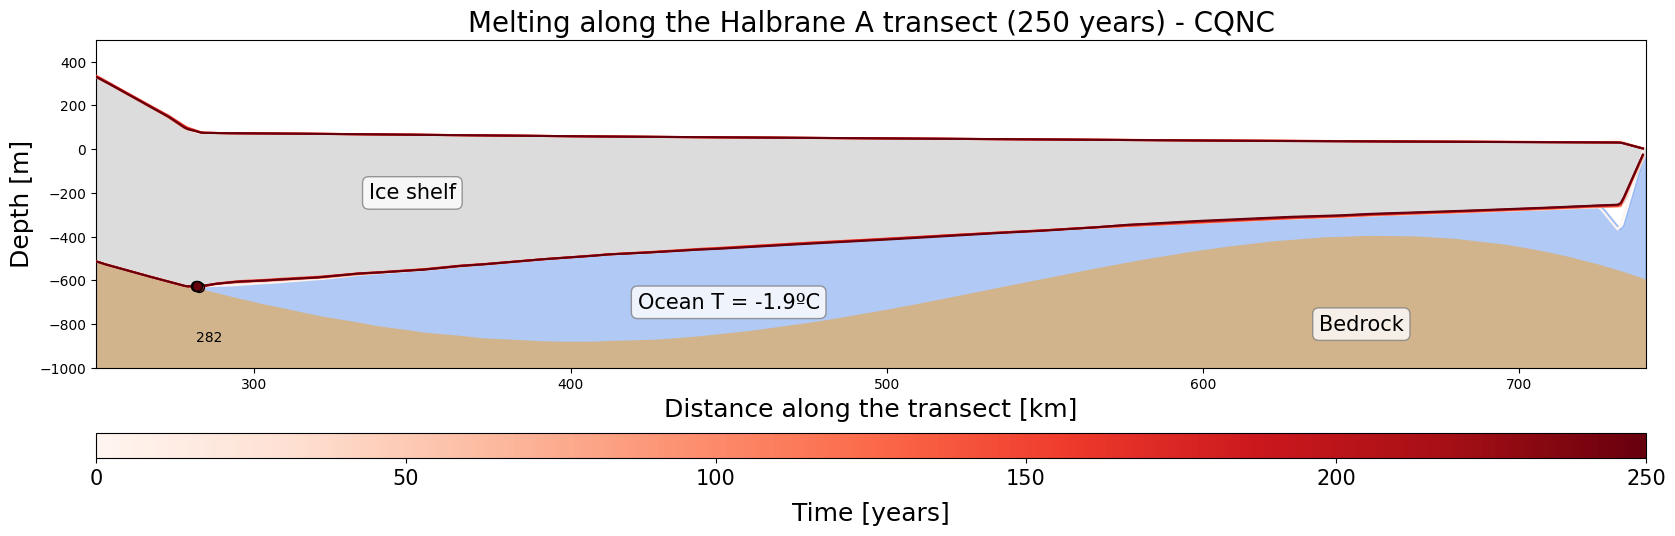

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))

# Base of ice shelf over time 
cmap2 = plt.get_cmap('Reds')                                                                       
norm = plt.Normalize(0, Hib1B.shape[0] - 1) 
for i in range(0, Hib1B.shape[0], 5): 
    color2 = cmap2(norm(i))
    color = cmap2(norm(i))
    ax.plot(Hib1B[i], color=color2, zorder=3) 
    ax.plot(Hs1B[i], color=color, zorder=3) 

    #Grounding line positions
    GLB_1  = GLB1[i] /1000
    clo1 = np.abs(xB - GLB_1.values).argmin()
    ax.scatter(x=GLB_1, y=Hib1B[i][clo1], color=color2, s=50, edgecolor='black', zorder=4)
    #ax.text(float(GLB_1), Hib1B[i][clo1]-250, s=f"{float(GLB_1):.0f}")
        
    if i > 0:
        prev_GLB_1 = GLB1[i-5] / 1000  # step is 5
        if abs(GLB_1.values - prev_GLB_1.values) > 5:
            ax.text(float(GLB_1), Hib1B[i][clo1]-250, s=f"{float(GLB_1):.0f}")
    elif i == 0:
        ax.text(float(GLB_1), Hib1B[i][clo1]-250, s=f"{float(GLB_1):.0f}")


sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])  
cbar2 = fig.colorbar(sm2, ax=ax, orientation='horizontal', pad=0.14, aspect=60)  
cbar2.set_label('Time [years]', fontsize=afs, labelpad=10)
cbar2.ax.tick_params(labelsize=tifs)
cbar2.ax.set_xticks(np.arange(0, Hib1B.shape[0], 5))
cbar2.ax.set_xticklabels((np.arange(0, Hib1B.shape[0], 5) * 10).astype(int), fontsize=tifs) 


# Fill betweens and texts 
ax.fill_between(xB, Hs1B[-1], Hib1B[-1], color='gainsboro', alpha=1, zorder=2)  
#ax.fill_between(xA, Hs1[-1], 200 * np.ones(len(Hib1[0])), color='cornflowerblue', alpha=0.5, zorder=2)  
ax.fill_between(xB, -2500 * np.ones(len(Hib1B[0])), Hb1B[-1], color='tan', alpha=1, zorder = 2)
ax.fill_between(xB, Hib1B[0], -2500 * np.ones(len(Hib1B[0])), color='cornflowerblue', alpha=0.5, zorder=1)

ax.text(x=350, y=-200, s="Ice shelf", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.text(x=450, y=-1550, s="Ocean", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
ax.text(x=650, y=-800, s="Bedrock", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.text(x=161, y=140, s="b)", fontsize=afs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.axhline(-1500, color='black', linestyle='--', linewidth=1.5, label='-1500 m')
ax.text(x=450, y=-700, s="Ocean T = -1.9ºC", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))

# Labels and titles
ax.set_xlabel('Distance along the transect [km]', fontsize=afs)
ax.set_xlim(250, 740)
#ax.set_xticks(np.arange(0, 491, 50))
#ax.set_xticklabels(np.arange(0, 491, 50) , fontsize=tifs)

ax.set_ylabel('Depth [m]', fontsize=afs)
ax.set_ylim(-1000,500)
#ax.set_yticklabels(np.arange(-2500,1001,500), fontsize=tifs)

ax.set_title('Melting along the Halbrane ' + which + ' transect (250 years) - ' + name1 , fontsize=tfs)

plt.show()


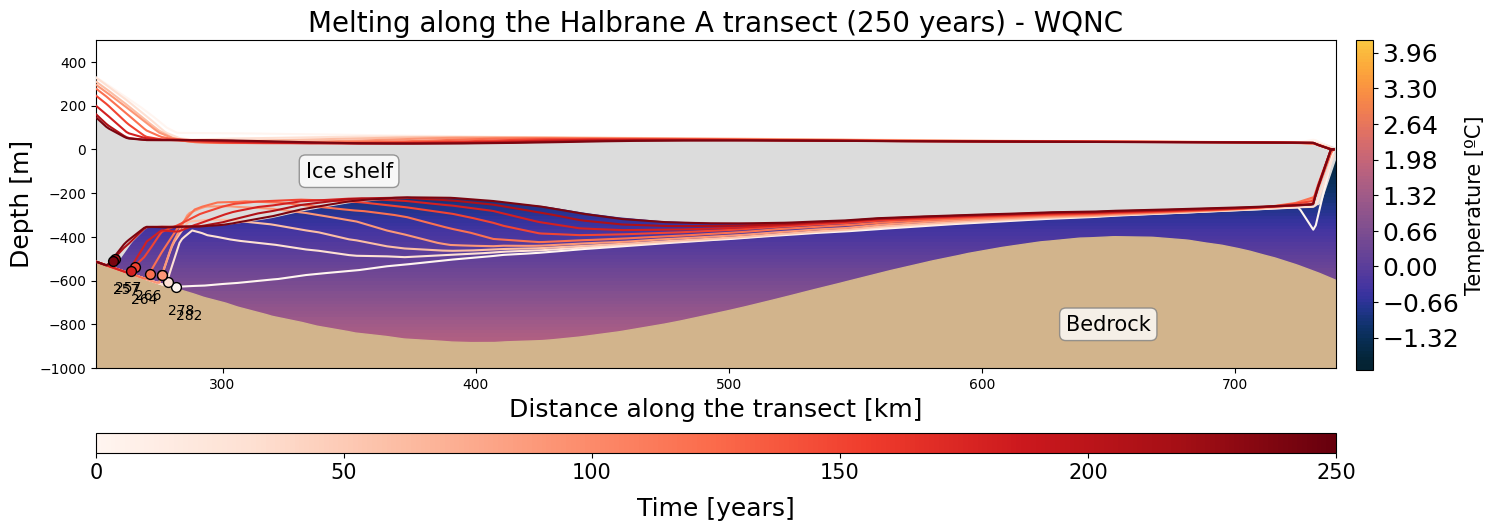

In [24]:
fig, ax = plt.subplots(figsize=(20, 6))

# Background
contour = ax.contourf(XB, -YB, To2B, cmap=cmo.thermal, levels=100, zorder=1, vmin=-1.8, vmax=5) 
cbar = fig.colorbar(contour, ax=ax, shrink=0.8, pad=0.05, aspect=20)
cbar.ax.tick_params(labelsize=cbfs)
cbar.set_label('Temperature [ºC]', fontsize=ctfs)
plot_pos = ax.get_position()
cbar.ax.set_position([
    plot_pos.x1 + 0.01,      
    plot_pos.y0 + 0.22,      
    0.1,                 
    plot_pos.height * 0.715   
])

# Find the last color in contour corresponding to depth 1500 to fill in between 1500 and 2500 depth
depth_1500_idx = np.abs(depth.values - 1500).argmin()
last_color = contour.cmap(contour.norm(To2B[depth_1500_idx, -1]))
ax.fill_between(xB, -1500 * np.ones(len(Hib2B[0])),-2500 * np.ones(len(Hib2B[0])), color =last_color, alpha=1, zorder=1)


# Base of ice shelf over time 
cmap2 = plt.get_cmap('Reds')                                                                        
norm = plt.Normalize(0, Hib2B.shape[0] - 1) 

for i in range(0, Hib2B.shape[0], 3): 
    color2 = cmap2(norm(i))
    color = cmap2(norm(i))
    ax.plot(Hib2B[i], color=color2, zorder=3) 
    ax.plot(Hs2B[i], color=color, zorder=3) 

    #Grounding line positions
    GLB_2  = GLB2[i] /1000
    clo2 = np.abs(xB - GLB_2.values).argmin()
    ax.scatter(x=GLB_2, y=Hib2B[i][clo2], color=color2, s=50, edgecolor='black', zorder=4)
    #ax.text(float(GLA_2), Hib2A[i][clo2]-250, s=f"{float(GLA_2):.0f}")
        
    if i > 0:
        prev_GLB_2 = GLB2[i-5] / 1000  # step is 5
        if abs(GLB_2.values - prev_GLB_2.values) > 5:
            ax.text(float(GLB_2), Hib2B[i][clo2]-150, s=f"{float(GLB_2):.0f}")
    elif i == 0:
        ax.text(float(GLB_2), Hib2B[i][clo2]-150, s=f"{float(GLB_2):.0f}")


sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)

sm2.set_array([])  
cbar2 = fig.colorbar(sm2, ax=ax, orientation='horizontal', pad=0.14, aspect=60)  
cbar2.set_label('Time [years]', fontsize=afs, labelpad=10)
cbar2.ax.tick_params(labelsize=tifs)
cbar2.ax.set_xticks(np.arange(0, Hib2B.shape[0], 5))
cbar2.ax.set_xticklabels((np.arange(0, Hib2B.shape[0], 5) * 10).astype(int), fontsize=tifs) 


# Fill betweens and texts 
ax.fill_between(xB, Hs2B[-1], Hib2B[-1], color='gainsboro', alpha=1, zorder=2)  
#ax.fill_between(xA, Hs1[-1], 200 * np.ones(len(Hib1[0])), color='cornflowerblue', alpha=0.5, zorder=2)  
ax.fill_between(xB, -2500 * np.ones(len(Hib2B[0])), Hb2B[-1], color='tan', alpha=1, zorder = 2)


ax.text(x=350, y=-100, s="Ice shelf", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.text(x=450, y=-1550, s="Ocean", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
ax.text(x=650, y=-800, s="Bedrock", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.text(x=161, y=140, s="b)", fontsize=afs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
#ax.axhline(-1500, color='black', linestyle='--', linewidth=1.5, label='-1500 m')

# Labels and titles
# Labels and titles
ax.set_xlabel('Distance along the transect [km]', fontsize=afs)
ax.set_xlim(250, 740)
#ax.set_xticks(np.arange(0, 491, 50))
#ax.set_xticklabels(np.arange(0, 491, 50) , fontsize=tifs)

ax.set_ylabel('Depth [m]', fontsize=afs)
ax.set_ylim(-1000,500)
#ax.set_yticklabels(np.arange(-2500,1001,500), fontsize=tifs)


ax.set_title('Melting along the Halbrane ' + which + ' transect (250 years) - ' + name2 , fontsize=tfs)

plt.show()

NameError: name 'Hi1' is not defined

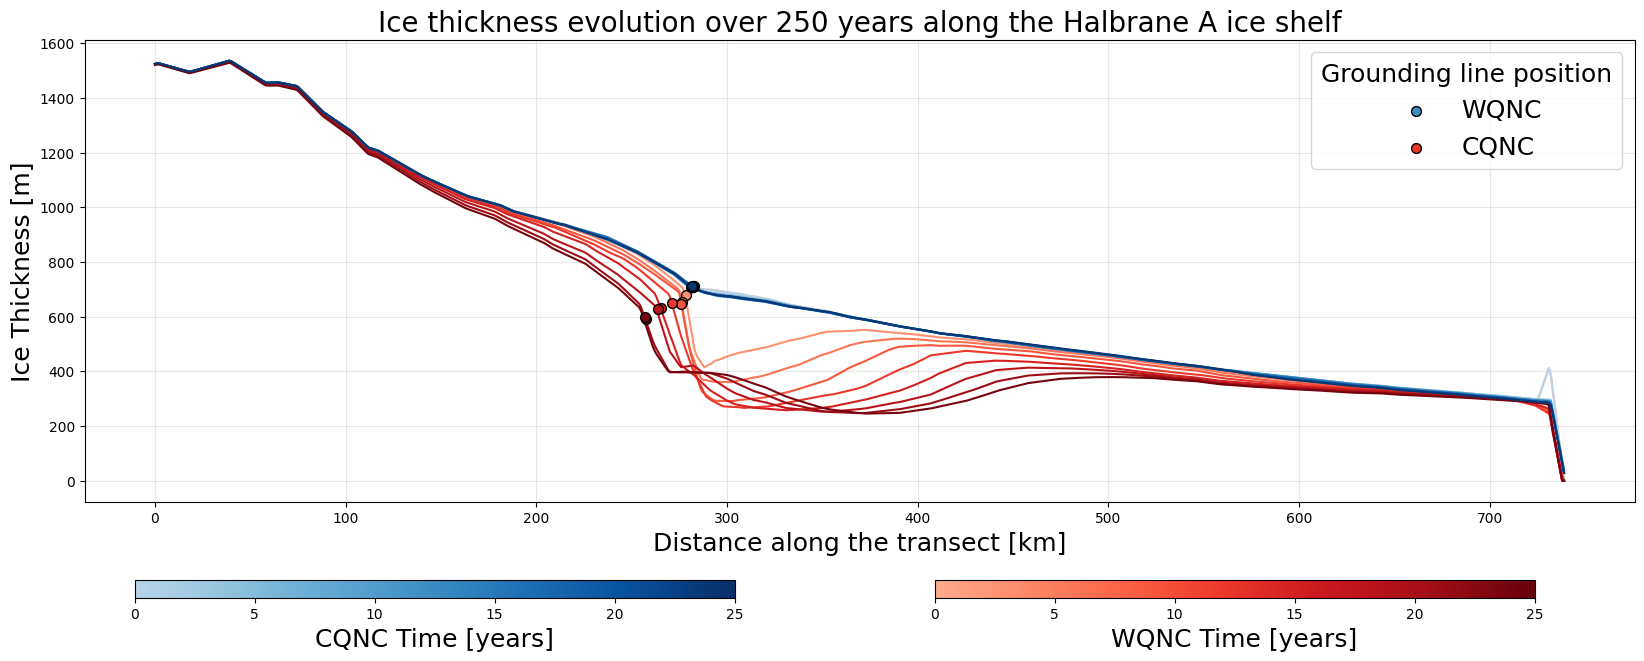

In [25]:
# Select time step one (i.e., time index 1) for all relevant DataArrays
cmap1 = plt.get_cmap('Blues')
cmap2 = plt.get_cmap('Reds')                                                                        
norm = plt.Normalize(0, Hi1B.shape[0] - 1)

cmap1_dark = mcolors.LinearSegmentedColormap.from_list('trunc_blues', cmap1(np.linspace(0.3, 1.0, 256)))
cmap2_dark = mcolors.LinearSegmentedColormap.from_list('trunc_reds', cmap2(np.linspace(0.3, 1.0, 256)))

fig, ax = plt.subplots(figsize=(20, 6))

#Grounding line positions
for i in range(0, Hi1B.shape[0], 3): 
    color2 = cmap2_dark(norm(i))
    color1 = cmap1_dark(norm(i))
    H_1 = Hi1B.isel(time=i)
    H_2 = Hi2B.isel(time=i)
    GLB_1  = GLB1[i] / 1000
    GLB_2  = GLB2[i] / 1000
    
    ax.plot(H_2, color=color2, zorder=3)
    ax.plot(H_1, color=color1, zorder=3)

    clo1 = np.abs(xB - GLB_1.values).argmin()
    clo2 = np.abs(xB - GLB_2.values).argmin()
    
    ax.scatter(x=GLB_1, y=H_1[clo1], color=color1, s=50, edgecolor='black', zorder=4, label='WQNC' if i == 12 else "") 
    ax.scatter(x=GLB_2, y=H_2[clo2], color=color2, s=50, edgecolor='black', zorder=4, label='CQNC' if i == 12 else "") 

legend = ax.legend(fontsize=afs, title='Grounding line position', title_fontsize=afs)
ax.set_title('Ice thickness evolution over 250 years along the Halbrane A ice shelf', fontsize=tfs)
#ax.set_xlim(0, 500)
#ax.set_ylim(1500, 2500)
ax.set_xlabel('Distance along the transect [km]', fontsize=afs)
ax.set_ylabel('Ice Thickness [m]', fontsize=afs)
plt.grid(alpha=0.3)

# Create dual colorbars
cbar_ax1 = fig.add_axes([0.15, -0.05, 0.3, 0.03])  # [left, bottom, width, height]
cbar_ax2 = fig.add_axes([0.55, -0.05, 0.3, 0.03])

sm1 = plt.cm.ScalarMappable(cmap=cmap1_dark, norm=norm)
sm1.set_array([])  
cbar1 = fig.colorbar(sm1, cax=cbar_ax1, orientation='horizontal')
cbar1.set_label('CQNC Time [years]', fontsize=afs)

sm2 = plt.cm.ScalarMappable(cmap=cmap2_dark, norm=norm)
sm2.set_array([])  
cbar2 = fig.colorbar(sm2, cax=cbar_ax2, orientation='horizontal')
cbar2.set_label('WQNC Time [years]', fontsize=afs)

# Set same ticks for both colorbars
ticks = np.arange(0, Hi1.shape[0], 5)
cbar1.set_ticks(ticks)
cbar1.set_ticklabels((ticks * 10).astype(int))
cbar2.set_ticks(ticks)
cbar2.set_ticklabels((ticks * 10).astype(int))

plt.tight_layout()
plt.show()

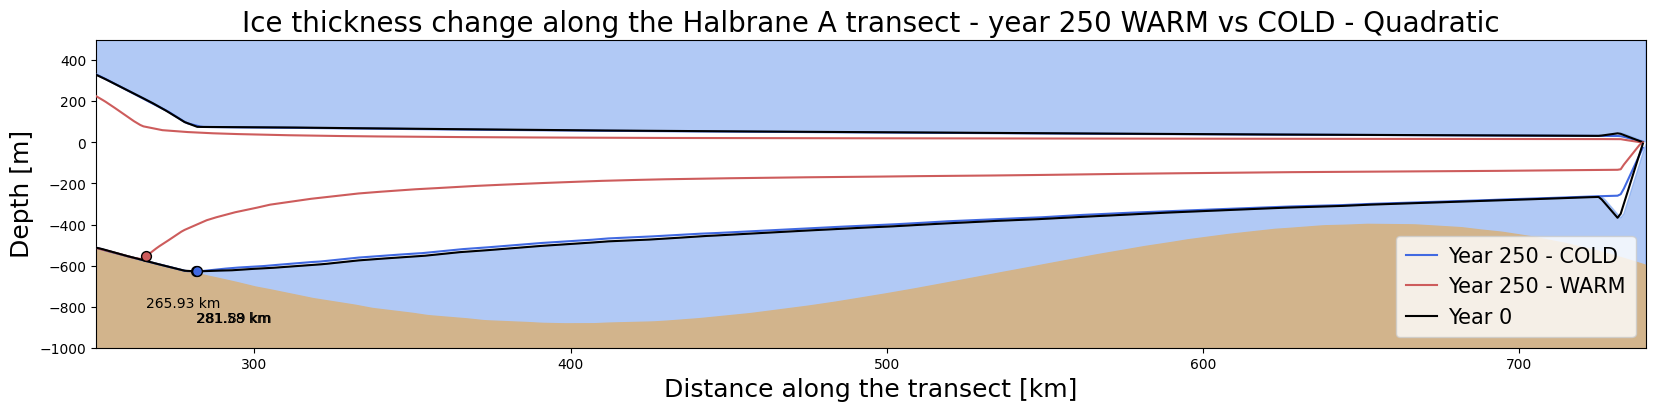

In [ ]:
fig, ax = plt.subplots(figsize=(20, 4))

# Surface of ice shelfs  
ax.plot(Hs1B[-1], color='royalblue', zorder=3)
ax.plot(Hs2B[-1], color='indianred', zorder=3)
ax.plot(Hs2B[0], color='black', zorder=3)

# Base of ice shelfs
ax.plot(Hib1B[-1], color='royalblue', zorder=3,label= 'Year 250 - COLD')
ax.plot(Hib2B[-1], color='indianred', zorder=3, label ='Year 250 - WARM')
ax.plot(Hib1B[0], color='black', zorder=3, label = 'Year 0')

ax.legend(loc='lower right', fontsize=ctfs, frameon=True, handlelength=1.5, handletextpad=0.5, borderpad=0.5)

#grounding line positions
GL_B1 = GLB1[-1] /1000
GL_B2 = GLB2[-1] /1000
GL_B = GLB1[0] /1000

clo1 = np.abs(xB - GL_B1.values).argmin()
clo2 = np.abs(xB - GL_B2.values).argmin()
clo = np.abs(xB - GL_B.values).argmin() 

ax.scatter(x=GL_B, y=Hib1B[0][clo], color='black', s=50, edgecolor='black', zorder=4)
ax.text(float(GL_B), Hib1B[0][clo]-250, s=f"{float(GL_B):.2f} km")     
ax.scatter(x=GL_B1, y=Hib1B[-1][clo1], color='royalblue', s=50, edgecolor='black', zorder=4)
ax.text(float(GL_B1), Hib1B[-1][clo1]-250,s=f"{float(GL_B1):.2f} km")
ax.scatter(x=GL_B2, y=Hib2B[-1][clo2], color='indianred', s=50, edgecolor='black', zorder=4)
ax.text(float(GL_B2), Hib2B[-1][clo2]-250,s=f"{float(GL_B2):.2f} km")

# Fill betweens 
#ax.fill_between(xA, Hs1[-1], Hib2[-1], color='gainsboro', alpha=1, zorder=2)  
ax.fill_between(xB, -2500 * np.ones(len(Hib2B[0])), Hb2B[-1], color='tan', alpha=1, zorder = 2)
ax.fill_between(xB, Hib1B[0], -2500 * np.ones(len(Hib1B[0])), color='cornflowerblue', alpha=0.5, zorder=1) 
ax.fill_between(xB, Hs1B[0], 1000 * np.ones(len(Hib1B[0])), color='cornflowerblue', alpha=0.5, zorder=1) 

# Labels and titles
ax.set_xlabel('Distance along the transect [km]', fontsize=afs)
ax.set_xlim(250, 740)
#ax.set_xticks(np.arange(690, 741, 10))
#ax.set_xticklabels(np.arange(1500, 7401, 500) / 10, fontsize=tifs)

ax.set_ylabel('Depth [m]', fontsize=afs)
ax.set_ylim(-1000,500)
#ax.set_yticklabels(np.arange(-2500, 1000,100), fontsize=tifs)

ax.set_title('Ice thickness change along the Halbrane A transect - year 250 WARM vs COLD - Quadratic', fontsize=tfs)

plt.show()


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/2580631569.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels((plt.gca().get_yticks() / 1000).astype(int))


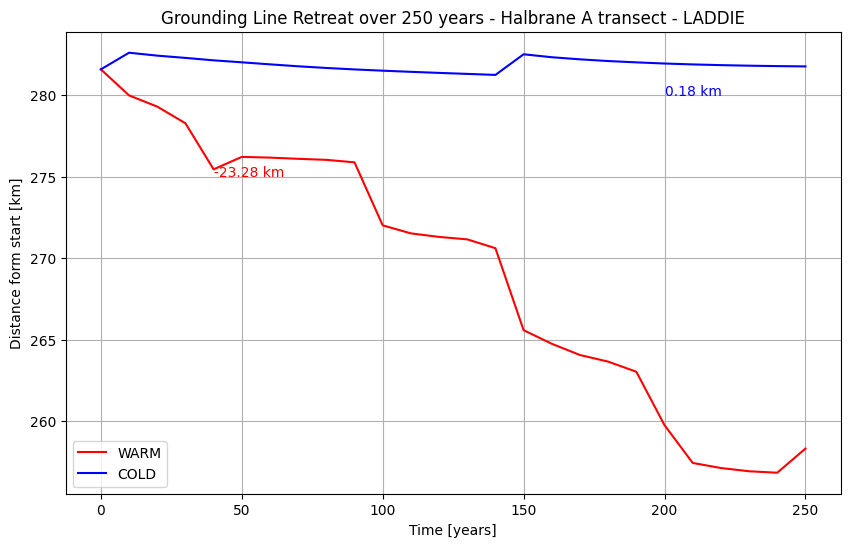

In [30]:
plt.figure(figsize=(10, 6))
plt.title('Grounding Line Retreat over 50 years')

GLB2.plot(color='red', label='WARM')
GLB1.plot(color='blue', label='COLD')
plt.legend()

plt.xlabel('Time [years]')
plt.ylabel('Distance form start [km]')
plt.gca().set_yticklabels((plt.gca().get_yticks() / 1000).astype(int))
plt.grid()

# Corrected text formatting
plt.text(40, 275000, f"{(GLB2[-1] - GLB2[0]).values / 1000:.2f} km", color='red')
plt.text(200, 280000, f"{(GLB1[-1] - GLB1[0]).values / 1000:.2f} km", color='blue')
plt.title('Grounding Line Retreat over 250 years - Halbrane A transect - LADDIE')
plt.show()

## Melt or Freeze


In [ ]:
cmap2 = plt.get_cmap('Reds')                                                                       
norm = plt.Normalize(0,10) 

cmap = plt.get_cmap('Blues')                                                                       
norm2 = plt.Normalize(0, 1)

time_indices = np.arange(len(GLB2))

/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/801150535.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,k].set_yticklabels((np.arange(0, 26, 5)*10) , fontsize=tifs)
/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/801150535.py:141: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,k].set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)
/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/801150535.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,k].set_yticklabels((np.arange(0, 26, 5)*10) , fontsize=tifs)
/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/801150535.py:141: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

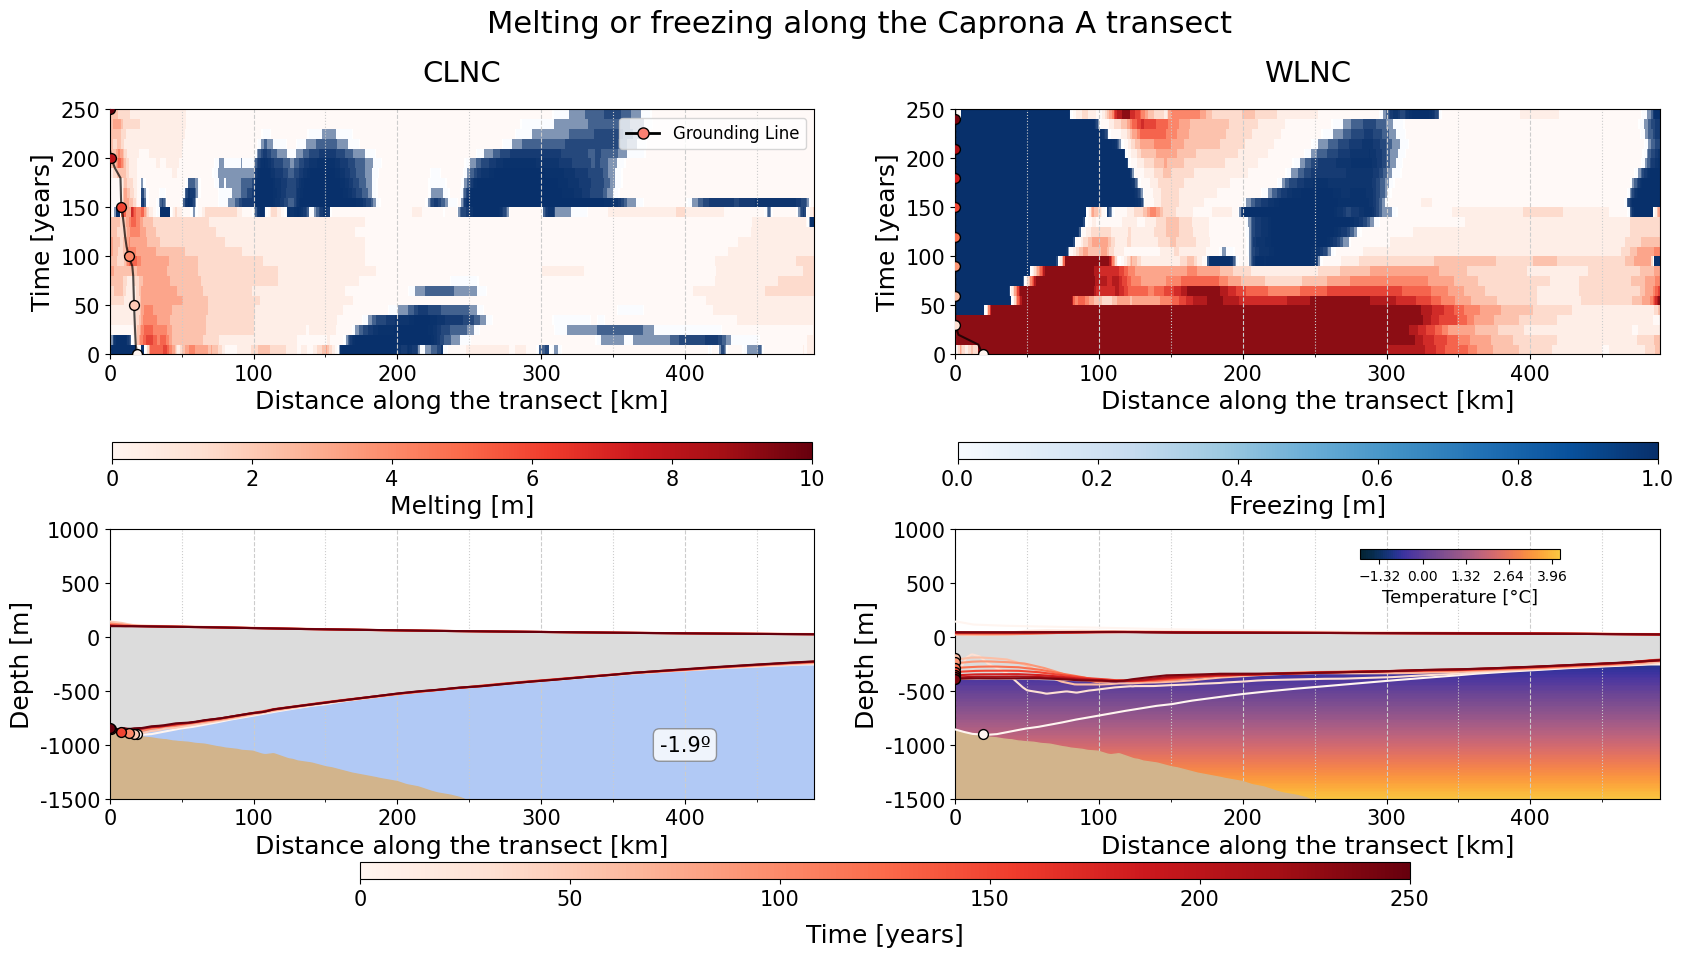

In [31]:
# Define colormaps with DIFFERENT names
cmap_melting = plt.get_cmap('Reds')                                                                       
norm_melting = plt.Normalize(0,10)

cmap_freezing = plt.get_cmap('Blues')                                                                       
norm_freezing = plt.Normalize(0, 1)

cmap_time = plt.get_cmap('Reds')                                                                        
norm_time = plt.Normalize(0, Hib2A.shape[0] - 1)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Melting or freezing along the Caprona A transect', fontsize=22, y=0.98)

# FIRST ROW 
## Color filling
for a in range(0,25,1):
    for k in range (0,11,1):
        ax[0,0].fill_between(xA,a,a+1, where= Hi1A[a+1]- Hi1A[a] < -k , facecolor=cmap_melting(norm_melting(k)), alpha=.5 ) # MELTING
        ax[0,0].fill_between(xA,a,a+1, where= Hi1A[a+1]- Hi1A[a] > k/10, facecolor=cmap_freezing(norm_freezing(k)), alpha=.5 ) # FREEZING
        ax[0,1].fill_between(xA,a,a+1, where= Hi2A[a+1]- Hi2A[a] < -k, facecolor=cmap_melting(norm_melting(k)), alpha=.5 )
        ax[0,1].fill_between(xA,a,a+1, where= Hi2A[a+1]- Hi2A[a] > k/10, facecolor=cmap_freezing(norm_freezing(k)), alpha=.5 )

# Melting
sm = mpl.cm.ScalarMappable(cmap=cmap_melting, norm=norm_melting)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax[0,0], orientation='horizontal', pad=0.25, aspect=40, fraction=0.05)
cbar.set_label('Melting [m]', fontsize=cbfs)
cbar.ax.tick_params(labelsize=ctfs)

# Freezing
sm2 = mpl.cm.ScalarMappable(cmap=cmap_freezing, norm=norm_freezing)
sm2.set_array([])
cbar = fig.colorbar(sm2, ax=ax[0,1], orientation='horizontal', pad=0.25, aspect=40, fraction=0.05)
cbar.set_label('Freezing [m]', fontsize=cbfs)
cbar.ax.tick_params(labelsize=ctfs)

#title
ax[0,0].set_title('CLNC', fontsize = 21, pad=20)
ax[0,1].set_title('WLNC', fontsize = 21, pad=20)

# SECOND ROW
# COLD
# Lists to store ALL grounding line positions for connecting lines
gla1_all_positions = []
gla1_all_times = []

# First collect ALL positions
for i in range(Hib1A.shape[0]): 
    GLA_1 = GLA1[i] / 1000
    gla1_all_positions.append(float(GLA_1))
    gla1_all_times.append(i)

# Then plot the ice shelves and dots (every 5th)
for i in range(0, Hib1A.shape[0], 5): 
    color2 = cmap_time(norm_time(i))
    # base and surface of ice shelf
    ax[1,0].plot(Hib1A[i], color=color2, zorder=3) 
    ax[1,0].plot(Hs1A[i], color=color2, zorder=3) 
    
    #Grounding line positions
    GLA_1  = GLA1[i] /1000
    clo1 = np.abs(xA - GLA_1.values).argmin()
    ax[1,0].scatter(x=GLA_1, y=Hib1A[i][clo1], color=color2, s=50, edgecolor='black', zorder=4)
    ax[0,0].scatter(x=GLA_1, y=i, color=color2, s=50, edgecolor='black', zorder=4)
ax[0,0].plot([], [], color='black', linewidth=2, marker='o', markersize=8,  markerfacecolor='salmon', markeredgecolor='black', label='Grounding Line')
ax[0,0].legend(loc='upper right', fontsize=12)

# Plot connecting line for CQNC using ALL positions
ax[0,0].plot(gla1_all_positions, gla1_all_times, color='black', linewidth=1.5, zorder=3, alpha=0.7)

# Fill between 
ax[1,0].fill_between(xA, -2500 * np.ones(len(Hib1A[0])), np.zeros(len(Hib1A[0])), color='cornflowerblue', alpha=0.5, zorder=1) 
ax[1,0].fill_between(xA, Hs1A[-1], Hib1A[-1], color='gainsboro', alpha=1, zorder=2) 
ax[1,0].text(x=400, y=-1000, s="-1.9º", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))

# WARM 
contour = ax[1,1].contourf(XA, -YA, To2A, cmap = cmo.thermal, levels=100, zorder=1, vmin=-1.9, vmax=5)
cbar_ax = fig.add_axes([0.75, 0.43, 0.1, 0.01])
cbar = fig.colorbar(contour, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Temperature [°C]', fontsize=cbfs-5)

# Fix for the ticks line - define ticks first
ticks = cbar.ax.get_xticks()
cbar.ax.set_xticks(ticks[::2])
cbar.ax.tick_params(labelsize=ctfs-5)

ax[1,1].fill_between(xA, Hs2A[-1], Hib2A[-1], color='gainsboro', alpha=1, zorder=2) 

depth_1500_idx = np.abs(depth.values - 1500).argmin()
last_color = contour.cmap(contour.norm(To2A[depth_1500_idx, -1]))
ax[1,1].fill_between(xA, -1500 * np.ones(len(Hib2A[0])),-2500 * np.ones(len(Hib2A[0])), color =last_color, alpha=1, zorder=1)

# Lists to store ALL grounding line positions for connecting lines (WQNC)
gla2_all_positions = []
gla2_all_times = []

# First collect ALL positions for WQNC
for i in range(Hib2A.shape[0]): 
    GLA_2 = GLA2[i] / 1000
    gla2_all_positions.append(float(GLA_2))
    gla2_all_times.append(i)

# Base of ice shelf over time (plot every 3rd)
for i in range(0, Hib2A.shape[0], 3): 
    color2 = cmap_time(norm_time(i))
    ax[1,1].plot(Hib2A[i], color=color2, zorder=3) 
    ax[1,1].plot(Hs2A[i], color=color2, zorder=3) 

    #Grounding line positions
    GLA_2  = GLA2[i] /1000
    clo2 = np.abs(xA - GLA_2.values).argmin()
    ax[1,1].scatter(x=GLA_2, y=Hib2A[i][clo2], color=color2, s=50, edgecolor='black', zorder=4)
    ax[0,1].scatter(x=GLA_2, y=i, color=color2, s=50, edgecolor='black', zorder=4)

# Plot connecting line for WQNC using ALL positions
ax[0,1].plot(gla2_all_positions, gla2_all_times, color='black', linewidth=1.5, zorder=3, alpha=0.7)

for k in range(2):
    # ROW ONE
    ax[0,k].set_ylim(0,25)
    ax[0,k].set_xlim(0,490)
    ax[0,k].set_ylabel('Time [years]', fontsize=afs)
    ax[0,k].set_xlabel('Distance along the transect [km]', fontsize=afs)
    
    ax[0,k].set_xticks(np.arange(0, 491, 100))
    ax[0,k].set_xticklabels(np.arange(0, 491, 100) , fontsize=tifs)
    ax[0,k].set_yticklabels((np.arange(0, 26, 5)*10) , fontsize=tifs)

    #ROW TWO
    # Fill betweens and texts  
    ax[1,k].fill_between(xA, -2500 * np.ones(len(Hib1A[0])), Hb1A[-1], color='tan', alpha=1, zorder = 2)

    # Labels and titles
    ax[1,k].set_xlabel('Distance along the transect [km]', fontsize=afs)
    ax[1,k].set_xlim(0, 490)
    ax[1,k].set_xticks(np.arange(0, 491, 50))
    ax[1,k].set_xticklabels(np.arange(0, 491, 50) , fontsize=tifs)

    ax[1,k].set_ylabel('Depth [m]', fontsize=afs)
    ax[1,k].set_ylim(-1500,1000)
    ax[1,k].set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)

#grid
for i in range(2):
    for j in range(2):
        ax[i,j].set_xticks(np.arange(0, 491, 100))  # Major ticks
        ax[i,j].set_xticks(np.arange(0, 491, 50), minor=True)  # Minor ticks  
        ax[i,j].grid(which='major', axis='x', color='#CCCCCC', linestyle='--')
        ax[i,j].grid(which='minor', axis='x', color='#CCCCCC', linestyle=':')

# Colorbar for time under both ax[1,0] and ax[1,1] as a single shared colorbar below both plots
sm_time_cbar = plt.cm.ScalarMappable(cmap=cmap_time, norm=plt.Normalize(0, Hib1A.shape[0] - 1))
sm_time_cbar.set_array([])

cbar2 = fig.colorbar(sm_time_cbar, ax=[ax[1,0], ax[1,1]], orientation='horizontal', pad=0.18, aspect=60, fraction=0.05)
cbar2.set_label('Time [years]', fontsize=afs, labelpad=10)
cbar2.ax.tick_params(labelsize=tifs)
cbar2.ax.set_xticks(np.arange(0, Hib1A.shape[0], 5))
cbar2.ax.set_xticklabels((np.arange(0, Hib1A.shape[0], 5) * 10).astype(int), fontsize=tifs)

plt.show()

/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/406489792.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,k].set_yticklabels((np.arange(0, 26, 5)*10) , fontsize=tifs)
/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/406489792.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,k].set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)
/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/406489792.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,k].set_yticklabels((np.arange(0, 26, 5)*10) , fontsize=tifs)
/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/406489792.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

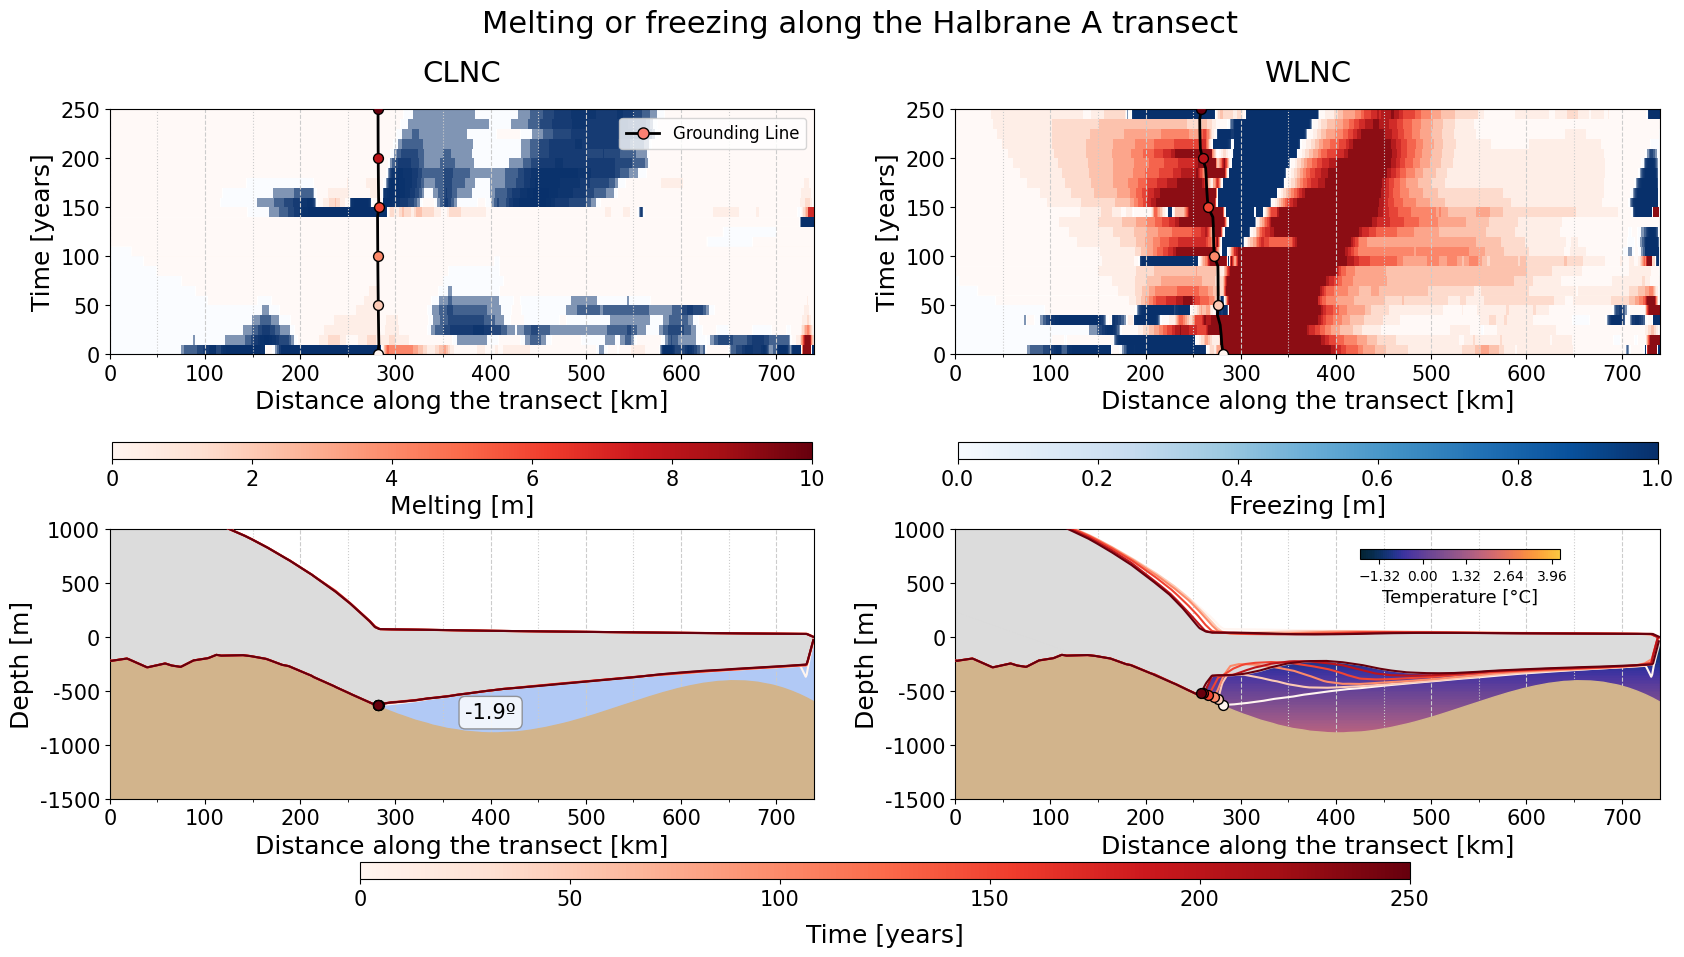

In [36]:
# Define colormaps with DIFFERENT names
cmap_melting = plt.get_cmap('Reds')                                                                       
norm_melting = plt.Normalize(0,10)

cmap_freezing = plt.get_cmap('Blues')                                                                       
norm_freezing = plt.Normalize(0, 1)

cmap_time = plt.get_cmap('Reds')                                                                        
norm_time = plt.Normalize(0, Hib2B.shape[0] - 1)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Melting or freezing along the Halbrane A transect', fontsize=22, y=0.98)

# FIRST ROW 
## Color filling
for a in range(0,25,1):
    for k in range (0,11,1):
        ax[0,0].fill_between(xB,a,a+1, where= Hi1B[a+1]- Hi1B[a] < -k , facecolor=cmap_melting(norm_melting(k)), alpha=.5 ) # MELTING
        ax[0,0].fill_between(xB,a,a+1, where= Hi1B[a+1]- Hi1B[a] > k/10, facecolor=cmap_freezing(norm_freezing(k)), alpha=.5 ) # FREEZING
        ax[0,1].fill_between(xB,a,a+1, where= Hi2B[a+1]- Hi2B[a] < -k, facecolor=cmap_melting(norm_melting(k)), alpha=.5 )
        ax[0,1].fill_between(xB,a,a+1, where= Hi2B[a+1]- Hi2B[a] > k/10, facecolor=cmap_freezing(norm_freezing(k)), alpha=.5 )

# Melting
sm = mpl.cm.ScalarMappable(cmap=cmap_melting, norm=norm_melting)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax[0,0], orientation='horizontal', pad=0.25, aspect=40, fraction=0.05)
cbar.set_label('Melting [m]', fontsize=cbfs)
cbar.ax.tick_params(labelsize=ctfs)

# Freezing
sm2 = mpl.cm.ScalarMappable(cmap=cmap_freezing, norm=norm_freezing)
sm2.set_array([])
cbar = fig.colorbar(sm2, ax=ax[0,1], orientation='horizontal', pad=0.25, aspect=40, fraction=0.05)
cbar.set_label('Freezing [m]', fontsize=cbfs)
cbar.ax.tick_params(labelsize=ctfs)

# Lists to store ALL grounding line positions for connecting lines
glb1_all_positions = []
glb1_all_times = []
glb2_all_positions = []
glb2_all_times = []

# Collect ALL positions for both CQNC and WQNC
for i in range(Hib1B.shape[0]): 
    GLB_1 = GLB1[i] / 1000
    glb1_all_positions.append(float(GLB_1))
    glb1_all_times.append(i)

for i in range(Hib2B.shape[0]): 
    GLB_2 = GLB2[i] / 1000
    glb2_all_positions.append(float(GLB_2))
    glb2_all_times.append(i)

# Plot connecting lines for both subplots
ax[0,0].plot(glb1_all_positions, glb1_all_times, color='black', linewidth=2, zorder=3)
ax[0,1].plot(glb2_all_positions, glb2_all_times, color='black', linewidth=2, zorder=3)
ax[0,0].plot([], [], color='black', linewidth=2, marker='o', markersize=8,  markerfacecolor='salmon', markeredgecolor='black', label='Grounding Line')
ax[0,0].legend(loc='upper right', fontsize=12)
#title
ax[0,0].set_title('CLNC', fontsize = 21, pad=20)
ax[0,1].set_title('WLNC', fontsize = 21, pad=20)

# SECOND ROW
# COLD
for i in range(0, Hib1B.shape[0], 5): 
    color2 = cmap_time(norm_time(i))
    # base and surface of ice shelf
    ax[1,0].plot(Hib1B[i], color=color2, zorder=3) 
    ax[1,0].plot(Hs1B[i], color=color2, zorder=3) 
    
    #Grounding line positions
    GLB_1  = GLB1[i] /1000
    clo1 = np.abs(xB - GLB_1.values).argmin()
    ax[1,0].scatter(x=GLB_1, y=Hib1B[i][clo1], color=color2, s=50, edgecolor='black', zorder=4)
    ax[0,0].scatter(x=GLB_1, y=i, color=color2, s=50, edgecolor='black', zorder=4)

# Fill between 
ax[1,0].fill_between(xB, -2500 * np.ones(len(Hib1B[0])), np.zeros(len(Hib1B[0])), color='cornflowerblue', alpha=0.5, zorder=1) 
ax[1,0].fill_between(xB, Hs1B[-1], Hib1B[-1], color='gainsboro', alpha=1, zorder=2) 
ax[1,0].text(x=400, y=-700, s="-1.9º", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))

# WARM 
contour = ax[1,1].contourf(XB, -YB, To2B, cmap = cmo.thermal, levels=100, zorder=1, vmin=-1.9, vmax=5)
cbar_ax = fig.add_axes([0.75, 0.43, 0.1, 0.01])
cbar = fig.colorbar(contour, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Temperature [°C]', fontsize=cbfs-5)

# Remove every second tick from the colorbar
ticks = cbar.ax.get_xticks()
cbar.ax.set_xticks(ticks[::2])
cbar.ax.tick_params(labelsize=ctfs-5)

ax[1,1].fill_between(xB, Hs2B[-1], Hib2B[-1], color='gainsboro', alpha=1, zorder=2) 

depth_1500_idx = np.abs(depth.values - 1500).argmin()
last_color = contour.cmap(contour.norm(To2B[depth_1500_idx, -1]))

for i in range(0, Hib2B.shape[0], 5): 
    color2 = cmap_time(norm_time(i))
    ax[1,1].plot(Hib2B[i], color=color2, zorder=3) 
    ax[1,1].plot(Hs2B[i], color=color2, zorder=3) 

    #Grounding line positions
    GLB_2  = GLB2[i] /1000
    clo2 = np.abs(xB - GLB_2.values).argmin()
    ax[1,1].scatter(x=GLB_2, y=Hib2B[i][clo2], color=color2, s=50, edgecolor='black', zorder=4)
    ax[0,1].scatter(x=GLB_2, y=i, color=color2, s=50, edgecolor='black', zorder=4)

for k in range(2):
    # ROW ONE
    ax[0,k].set_ylim(0,25)
    ax[0,k].set_xlim(0,740)
    ax[0,k].set_ylabel('Time [years]', fontsize=afs)
    ax[0,k].set_xlabel('Distance along the transect [km]', fontsize=afs)
    
    ax[0,k].set_xticks(np.arange(0, 741, 100))
    ax[0,k].set_xticklabels(np.arange(0, 741, 100) , fontsize=tifs)
    ax[0,k].set_yticklabels((np.arange(0, 26, 5)*10) , fontsize=tifs)

    #ROW TWO
    # Fill betweens and texts  
    ax[1,k].fill_between(xB, -2500 * np.ones(len(Hib1B[0])), Hb1B[-1], color='tan', alpha=1, zorder = 2)

    # Labels and titles
    ax[1,k].set_xlabel('Distance along the transect [km]', fontsize=afs)
    ax[1,k].set_xlim(0, 740)
    ax[1,k].set_xticks(np.arange(0, 741, 50))
    ax[1,k].set_xticklabels(np.arange(0, 741, 50) , fontsize=tifs)

    ax[1,k].set_ylabel('Depth [m]', fontsize=afs)
    ax[1,k].set_ylim(-1500,1000)
    ax[1,k].set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)

#grid
for i in range(2):
    for j in range(2):
        ax[i,j].set_xticks(np.arange(0, 741, 100))  # Major ticks
        ax[i,j].set_xticks(np.arange(0, 741, 50), minor=True)  # Minor ticks  
        ax[i,j].grid(which='major', axis='x', color='#CCCCCC', linestyle='--')
        ax[i,j].grid(which='minor', axis='x', color='#CCCCCC', linestyle=':')

# Colorbar for time under both ax[1,0] and ax[1,1] as a single shared colorbar below both plots
sm_time_cbar = plt.cm.ScalarMappable(cmap=cmap_time, norm=plt.Normalize(0, Hib1B.shape[0] - 1))
sm_time_cbar.set_array([])

cbar2 = fig.colorbar(sm_time_cbar, ax=[ax[1,0], ax[1,1]], orientation='horizontal', pad=0.18, aspect=60, fraction=0.05)
cbar2.set_label('Time [years]', fontsize=afs, labelpad=10)
cbar2.ax.tick_params(labelsize=tifs)
cbar2.ax.set_xticks(np.arange(0, Hib1B.shape[0], 5))
cbar2.ax.set_xticklabels((np.arange(0, Hib1B.shape[0], 5) * 10).astype(int), fontsize=tifs)

plt.show()

/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/1734303118.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,k].set_yticklabels((np.arange(0, 26, 5)*10) , fontsize=tifs)
/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/1734303118.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,k].set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)
/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/1734303118.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,k].set_yticklabels((np.arange(0, 26, 5)*10) , fontsize=tifs)
/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_17317/1734303118.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of tic

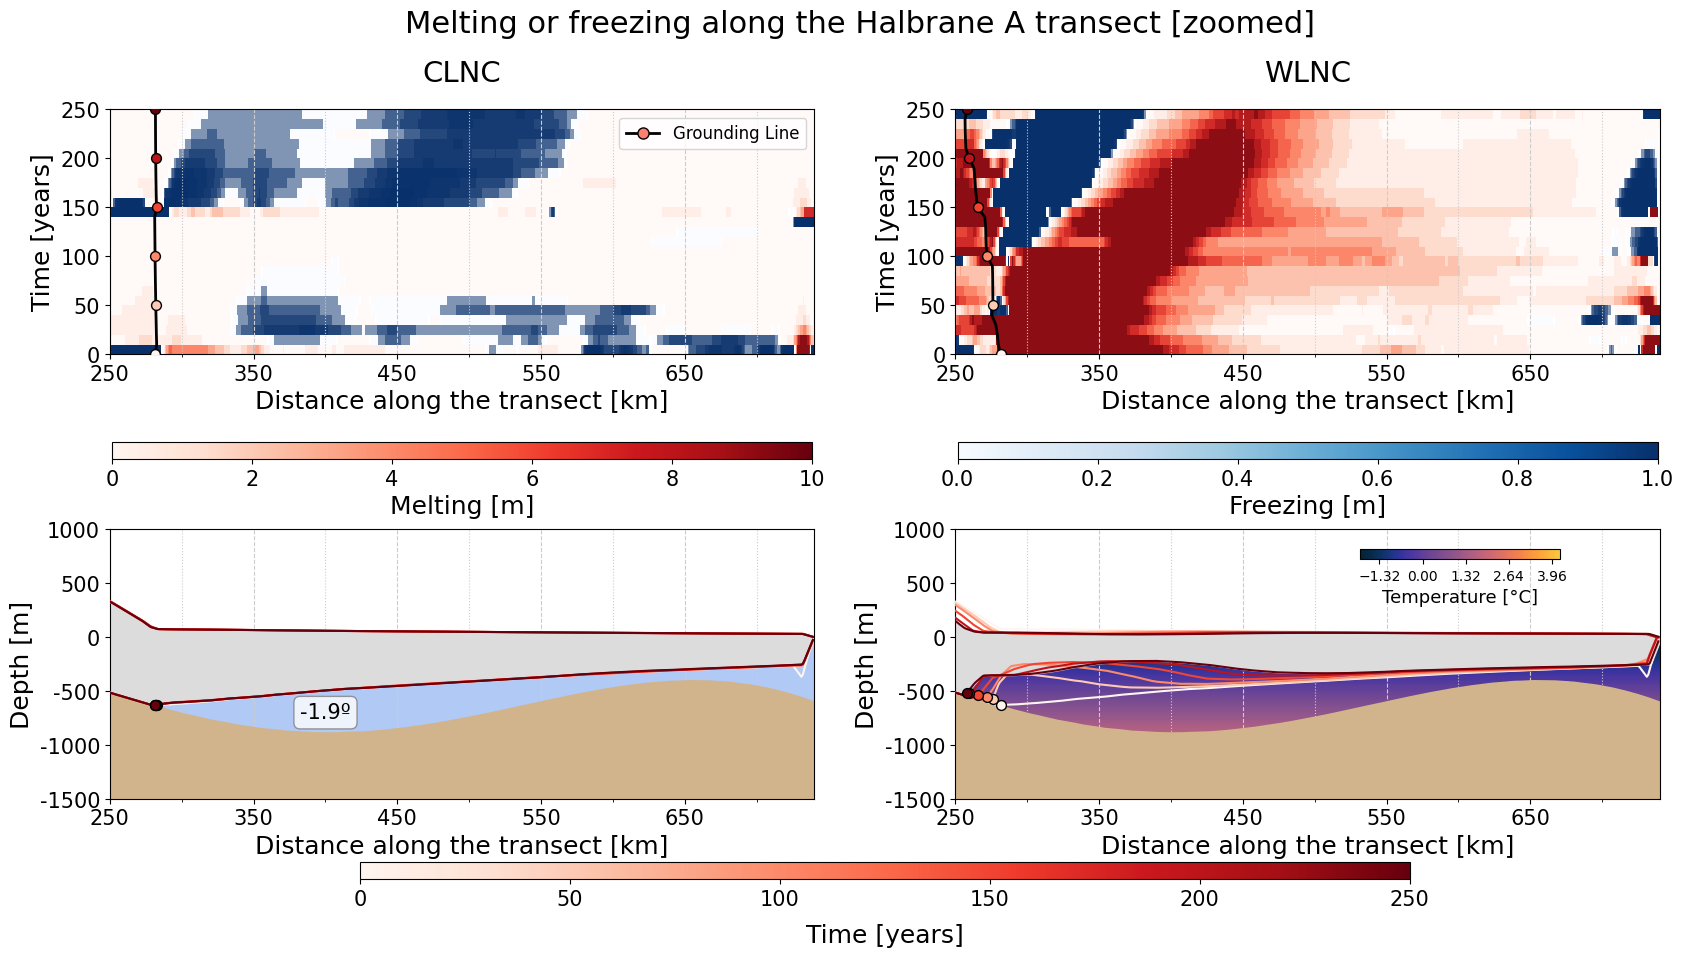

In [34]:
# Define colormaps with DIFFERENT names
cmap_melting = plt.get_cmap('Reds')                                                                       
norm_melting = plt.Normalize(0,10)

cmap_freezing = plt.get_cmap('Blues')                                                                       
norm_freezing = plt.Normalize(0, 1)

cmap_time = plt.get_cmap('Reds')                                                                        
norm_time = plt.Normalize(0, Hib2B.shape[0] - 1)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Melting or freezing along the Halbrane A transect [zoomed]', fontsize=22, y=0.98)

# FIRST ROW 
## Color filling
for a in range(0,25,1):
    for k in range (0,11,1):
        ax[0,0].fill_between(xB,a,a+1, where= Hi1B[a+1]- Hi1B[a] < -k , facecolor=cmap_melting(norm_melting(k)), alpha=.5 ) # MELTING
        ax[0,0].fill_between(xB,a,a+1, where= Hi1B[a+1]- Hi1B[a] > k/10, facecolor=cmap_freezing(norm_freezing(k)), alpha=.5 ) # FREEZING
        ax[0,1].fill_between(xB,a,a+1, where= Hi2B[a+1]- Hi2B[a] < -k, facecolor=cmap_melting(norm_melting(k)), alpha=.5 )
        ax[0,1].fill_between(xB,a,a+1, where= Hi2B[a+1]- Hi2B[a] > k/10, facecolor=cmap_freezing(norm_freezing(k)), alpha=.5 )

# Melting
sm = mpl.cm.ScalarMappable(cmap=cmap_melting, norm=norm_melting)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax[0,0], orientation='horizontal', pad=0.25, aspect=40, fraction=0.05)
cbar.set_label('Melting [m]', fontsize=cbfs)
cbar.ax.tick_params(labelsize=ctfs)

# Freezing
sm2 = mpl.cm.ScalarMappable(cmap=cmap_freezing, norm=norm_freezing)
sm2.set_array([])
cbar = fig.colorbar(sm2, ax=ax[0,1], orientation='horizontal', pad=0.25, aspect=40, fraction=0.05)
cbar.set_label('Freezing [m]', fontsize=cbfs)
cbar.ax.tick_params(labelsize=ctfs)

# Lists to store ALL grounding line positions for connecting lines
glb1_all_positions = []
glb1_all_times = []
glb2_all_positions = []
glb2_all_times = []

# Collect ALL positions for both CQNC and WQNC
for i in range(Hib1B.shape[0]): 
    GLB_1 = GLB1[i] / 1000
    glb1_all_positions.append(float(GLB_1))
    glb1_all_times.append(i)

for i in range(Hib2B.shape[0]): 
    GLB_2 = GLB2[i] / 1000
    glb2_all_positions.append(float(GLB_2))
    glb2_all_times.append(i)

# Plot connecting lines for both subplots
ax[0,0].plot(glb1_all_positions, glb1_all_times, color='black', linewidth=2, zorder=3)
ax[0,1].plot(glb2_all_positions, glb2_all_times, color='black', linewidth=2, zorder=3)
ax[0,0].plot([], [], color='black', linewidth=2, marker='o', markersize=8,  markerfacecolor='salmon', markeredgecolor='black', label='Grounding Line')
ax[0,0].legend(loc='upper right', fontsize=12)
#title
ax[0,0].set_title('CLNC', fontsize = 21, pad=20)
ax[0,1].set_title('WLNC', fontsize = 21, pad=20)

# SECOND ROW
# COLD
for i in range(0, Hib1B.shape[0], 5): 
    color2 = cmap_time(norm_time(i))
    # base and surface of ice shelf
    ax[1,0].plot(Hib1B[i], color=color2, zorder=3) 
    ax[1,0].plot(Hs1B[i], color=color2, zorder=3) 
    
    #Grounding line positions
    GLB_1  = GLB1[i] /1000
    clo1 = np.abs(xB - GLB_1.values).argmin()
    ax[1,0].scatter(x=GLB_1, y=Hib1B[i][clo1], color=color2, s=50, edgecolor='black', zorder=4)
    ax[0,0].scatter(x=GLB_1, y=i, color=color2, s=50, edgecolor='black', zorder=4)

# Fill between 
ax[1,0].fill_between(xB, -2500 * np.ones(len(Hib1B[0])), np.zeros(len(Hib1B[0])), color='cornflowerblue', alpha=0.5, zorder=1) 
ax[1,0].fill_between(xB, Hs1B[-1], Hib1B[-1], color='gainsboro', alpha=1, zorder=2) 
ax[1,0].text(x=400, y=-700, s="-1.9º", fontsize=tifs, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))

# WARM 
contour = ax[1,1].contourf(XB, -YB, To2B, cmap = cmo.thermal, levels=100, zorder=1, vmin=-1.9, vmax=5)
cbar_ax = fig.add_axes([0.75, 0.43, 0.1, 0.01])
cbar = fig.colorbar(contour, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Temperature [°C]', fontsize=cbfs-5)

# Remove every second tick from the colorbar
ticks = cbar.ax.get_xticks()
cbar.ax.set_xticks(ticks[::2])
cbar.ax.tick_params(labelsize=ctfs-5)

ax[1,1].fill_between(xB, Hs2B[-1], Hib2B[-1], color='gainsboro', alpha=1, zorder=2) 

depth_1500_idx = np.abs(depth.values - 1500).argmin()
last_color = contour.cmap(contour.norm(To2B[depth_1500_idx, -1]))

for i in range(0, Hib2B.shape[0], 5): 
    color2 = cmap_time(norm_time(i))
    ax[1,1].plot(Hib2B[i], color=color2, zorder=3) 
    ax[1,1].plot(Hs2B[i], color=color2, zorder=3) 

    #Grounding line positions
    GLB_2  = GLB2[i] /1000
    clo2 = np.abs(xB - GLB_2.values).argmin()
    ax[1,1].scatter(x=GLB_2, y=Hib2B[i][clo2], color=color2, s=50, edgecolor='black', zorder=4)
    ax[0,1].scatter(x=GLB_2, y=i, color=color2, s=50, edgecolor='black', zorder=4)

for k in range(2):
    # ROW ONE
    ax[0,k].set_ylim(0,25)
    ax[0,k].set_xlim(250,740)
    ax[0,k].set_ylabel('Time [years]', fontsize=afs)
    ax[0,k].set_xlabel('Distance along the transect [km]', fontsize=afs)
    
    ax[0,k].set_xticks(np.arange(250, 741, 100))
    ax[0,k].set_xticklabels(np.arange(250, 741, 100) , fontsize=tifs)
    ax[0,k].set_yticklabels((np.arange(0, 26, 5)*10) , fontsize=tifs)

    #ROW TWO
    # Fill betweens and texts  
    ax[1,k].fill_between(xB, -2500 * np.ones(len(Hib1B[0])), Hb1B[-1], color='tan', alpha=1, zorder = 2)

    # Labels and titles
    ax[1,k].set_xlabel('Distance along the transect [km]', fontsize=afs)
    ax[1,k].set_xlim(250, 740)
    ax[1,k].set_xticks(np.arange(250, 741, 50))
    ax[1,k].set_xticklabels(np.arange(250, 741, 50) , fontsize=tifs)

    ax[1,k].set_ylabel('Depth [m]', fontsize=afs)
    ax[1,k].set_ylim(-1500,1000)
    ax[1,k].set_yticklabels(np.arange(-1500,1001,500), fontsize=tifs)

#grid
for i in range(2):
    for j in range(2):
        ax[i,j].set_xticks(np.arange(250, 741, 100))  # Major ticks
        ax[i,j].set_xticks(np.arange(250, 741, 50), minor=True)  # Minor ticks  
        ax[i,j].grid(which='major', axis='x', color='#CCCCCC', linestyle='--')
        ax[i,j].grid(which='minor', axis='x', color='#CCCCCC', linestyle=':')

# Colorbar for time under both ax[1,0] and ax[1,1] as a single shared colorbar below both plots
sm_time_cbar = plt.cm.ScalarMappable(cmap=cmap_time, norm=plt.Normalize(0, Hib1B.shape[0] - 1))
sm_time_cbar.set_array([])

cbar2 = fig.colorbar(sm_time_cbar, ax=[ax[1,0], ax[1,1]], orientation='horizontal', pad=0.18, aspect=60, fraction=0.05)
cbar2.set_label('Time [years]', fontsize=afs, labelpad=10)
cbar2.ax.tick_params(labelsize=tifs)
cbar2.ax.set_xticks(np.arange(0, Hib1B.shape[0], 5))
cbar2.ax.set_xticklabels((np.arange(0, Hib1B.shape[0], 5) * 10).astype(int), fontsize=tifs)

plt.show()